## Part 1: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

In [2]:
#ARRANGE BTC PRICE DATAFRAME

df = pd.read_csv("BTC_historical_data_last.csv")
#drop 2021 data
n_tail = 32
n_head = 1188
df.drop(df.tail(n_tail).index,inplace=True)
df.drop(df.head(n_head).index,inplace=True)
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
1188,BTC,2017-01-01,964.325000,952.455000,968.485000,949.086250
1189,BTC,2017-01-02,1009.973750,964.325000,1011.525000,963.530000
1190,BTC,2017-01-03,1028.333750,1009.973750,1034.105000,998.621250
1191,BTC,2017-01-04,1047.099990,1028.333750,1048.123750,1013.377500
1192,BTC,2017-01-05,1140.385000,1047.099990,1141.997500,1047.063750
...,...,...,...,...,...,...
2629,BTC,2020-12-23,23433.980758,22729.659291,23629.404460,22384.127846
2630,BTC,2020-12-24,23224.454138,23791.565294,24086.950661,22644.561058
2631,BTC,2020-12-25,23623.885533,23228.909087,23737.757149,22716.174167
2632,BTC,2020-12-26,24581.006171,23726.190999,24627.297914,23422.310325


In [3]:
weekly_price_list = []
closing_prices = list(df['Closing Price (USD)'])

temp_list = []
for i in range(0,len(closing_prices)):
    if (i + 1) % 7 == 0:
        temp_list.append(closing_prices[i])
        weekly_price_list.append(temp_list)
        temp_list = []
    else:
        temp_list.append(closing_prices[i])
        
    
mean_weekly_list = []    
for i in weekly_price_list:
    mean_weekly_list.append(np.mean(i))
    
#len(mean_weekly_list)
mean_weekly_list

[1001.9846414285714,
 858.1341071428571,
 870.8037499999999,
 914.2276785714286,
 963.7555357142858,
 1027.1746414285715,
 1017.6185714285714,
 1112.9139271428571,
 1212.71057,
 1217.4027114285714,
 1192.346425714286,
 1023.576712857143,
 1020.8408542857143,
 1147.8891428571428,
 1203.426282857143,
 1221.29832,
 1277.5333928571429,
 1447.7299985714287,
 1659.5298214285715,
 1803.6194642857142,
 2287.143032857143,
 2324.5616042857146,
 2756.7523214285716,
 2696.0798199999995,
 2710.0449985714286,
 2559.4280314285716,
 2559.18375,
 2377.136248571428,
 2343.620891428571,
 2700.3805342857145,
 2816.55375,
 3420.284107142857,
 4219.528035714286,
 4179.868748571429,
 4593.250714285715,
 4485.219464285715,
 3955.7485699999997,
 3763.3749999999995,
 3982.4425,
 4332.706427142857,
 4979.380354285714,
 5705.200535714285,
 5793.775000000001,
 6533.885357142857,
 7208.051607142858,
 6908.555535714286,
 8037.998035714286,
 9943.708392857143,
 13150.484285714285,
 16201.342677142855,
 17065.23499714

In [4]:
trends_weekly_df = pd.read_csv("weekly_chart_google_trends.csv")
trends_weekly_df.columns = trends_weekly_df.iloc[0]
# trends_weekly_df = trends_weekly_df[47:256]
trends_weekly_df = trends_weekly_df[50:256]
trends_weekly_df['Bitcoin: (Dünya Genelinde)'] = trends_weekly_df['Bitcoin: (Dünya Genelinde)'].astype("int")
trends_weekly_df

Hafta,Bitcoin: (Dünya Genelinde)
2017-01-22,5
2017-01-29,5
2017-02-05,5
2017-02-12,5
2017-02-19,5
...,...
2020-11-29,22
2020-12-06,18
2020-12-13,28
2020-12-20,29


Text(0.5, 1.0, 'Google Trends Data')

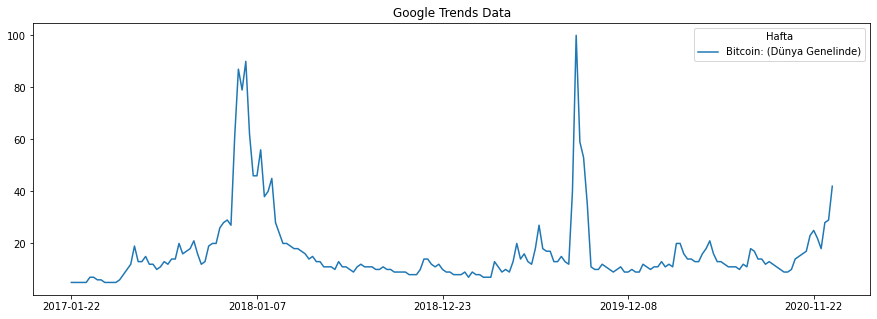

In [5]:
trends_weekly_df[['Bitcoin: (Dünya Genelinde)']].plot(figsize=(15, 5))
plt.title("Google Trends Data")

In [6]:
trends_weekly_df['Mean Prices'] = np.array(mean_weekly_list)
trends_weekly_df

Hafta,Bitcoin: (Dünya Genelinde),Mean Prices
2017-01-22,5,1001.984641
2017-01-29,5,858.134107
2017-02-05,5,870.803750
2017-02-12,5,914.227679
2017-02-19,5,963.755536
...,...,...
2020-11-29,22,18448.450613
2020-12-06,18,18178.690735
2020-12-13,28,19058.795087
2020-12-20,29,18811.005779


<AxesSubplot:xlabel='Hafta', ylabel='Hafta'>

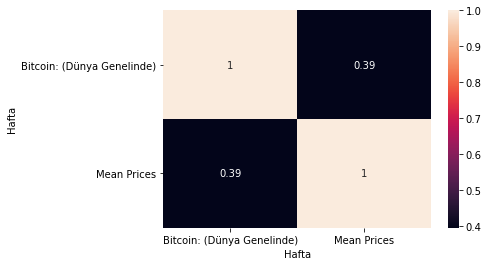

In [7]:
sns.heatmap(trends_weekly_df.corr(),annot = True)

In [8]:
# Check null values
trends_weekly_df.isnull().sum()

Hafta
Bitcoin: (Dünya Genelinde)    0
Mean Prices                   0
dtype: int64

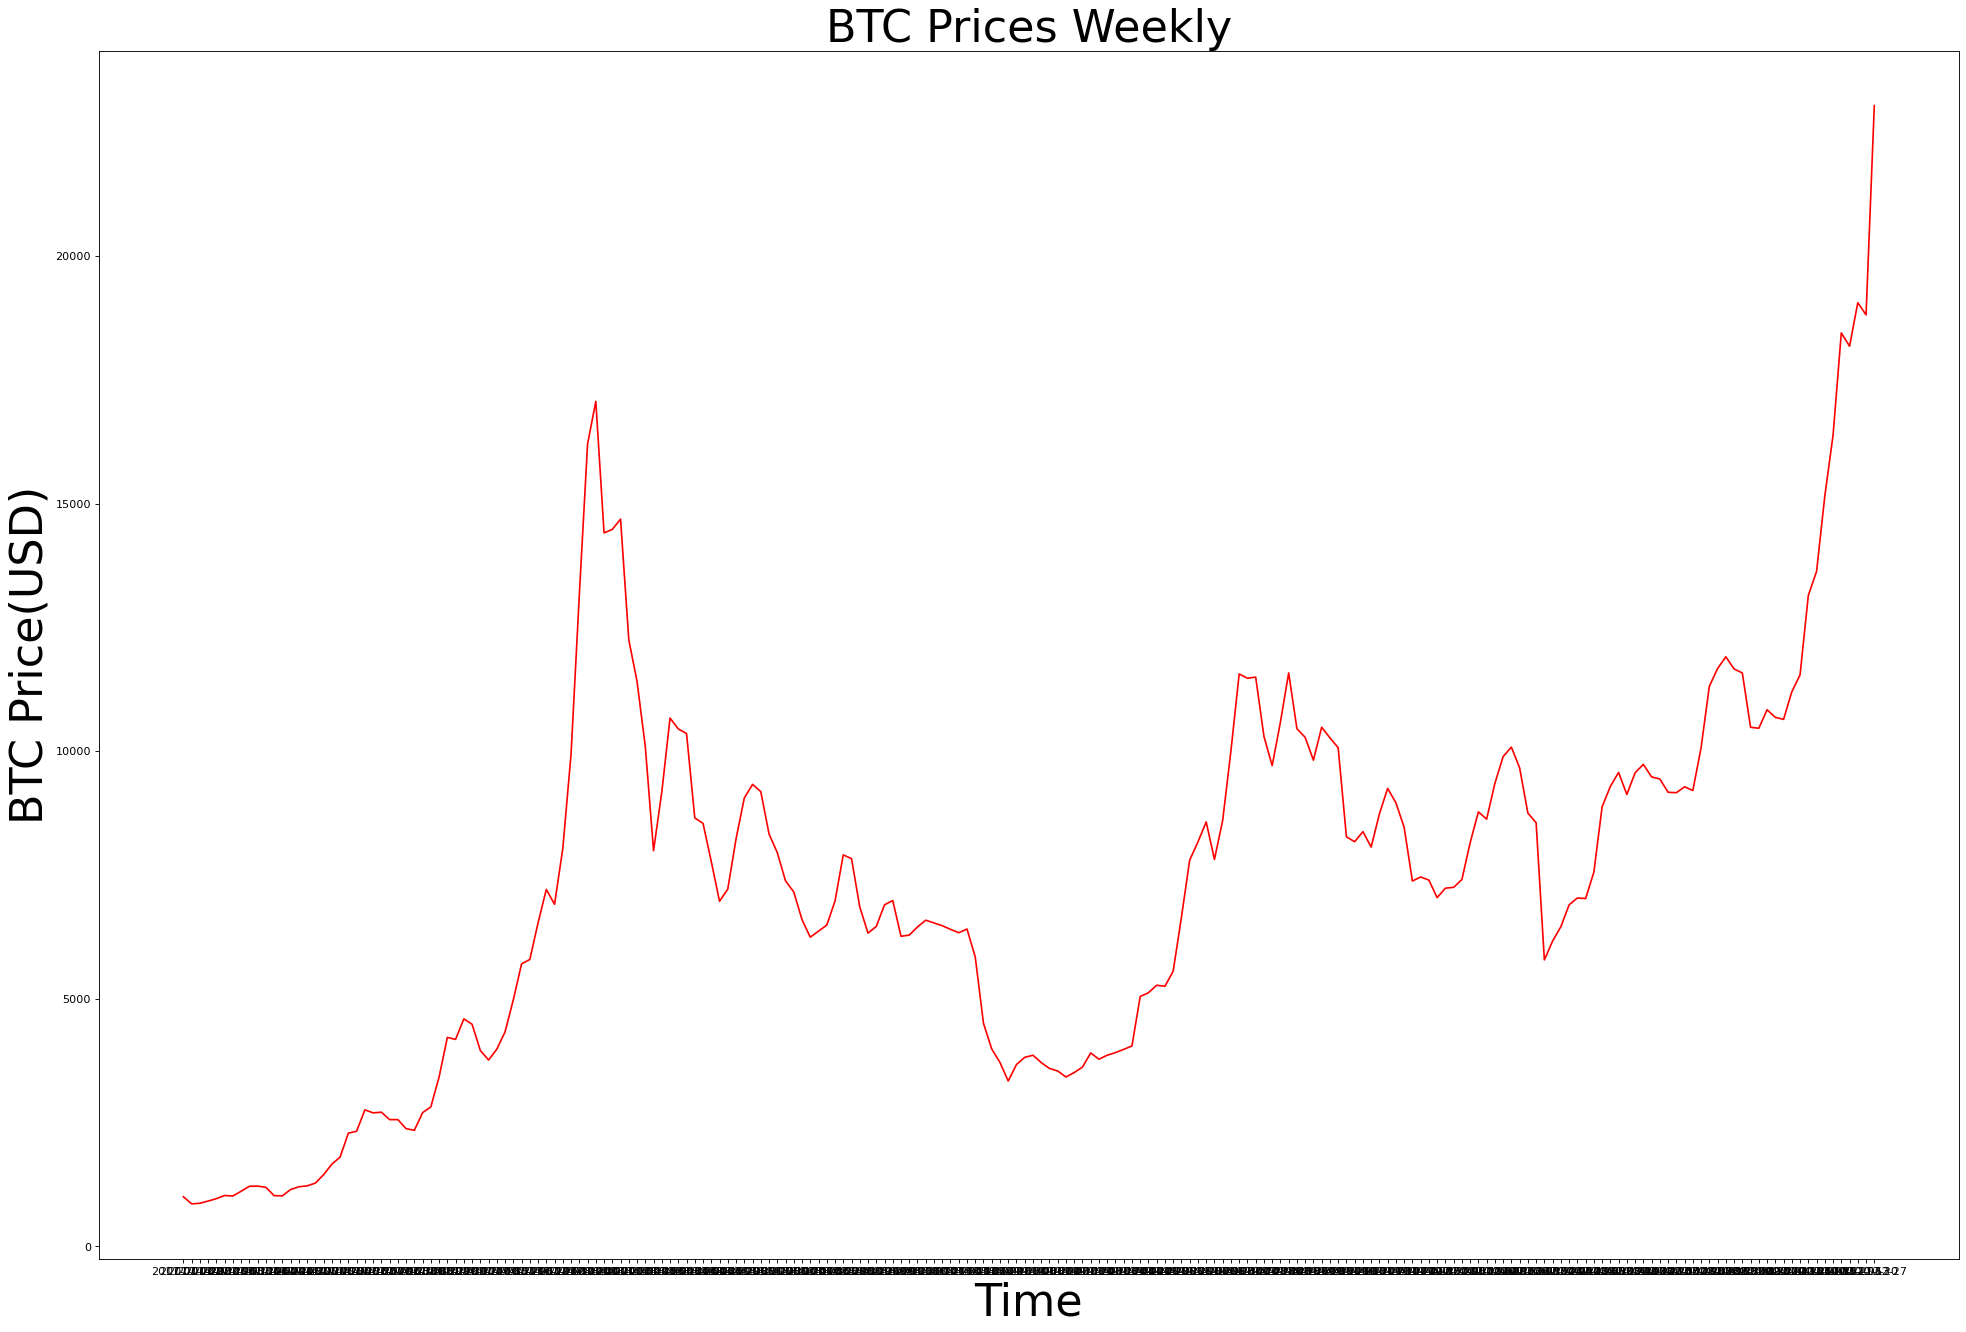

In [9]:
# The Prices of Bitcoin over time
plt.figure(figsize=(30, 20), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(trends_weekly_df['Mean Prices'], color='red', label='Real BTC Price')
plt.title('BTC Prices Weekly', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.show()

In [10]:
trends_weekly_df['Hafta Feature'] = trends_weekly_df.index
trends_weekly_df

Hafta,Bitcoin: (Dünya Genelinde),Mean Prices,Hafta Feature
2017-01-22,5,1001.984641,2017-01-22
2017-01-29,5,858.134107,2017-01-29
2017-02-05,5,870.803750,2017-02-05
2017-02-12,5,914.227679,2017-02-12
2017-02-19,5,963.755536,2017-02-19
...,...,...,...
2020-11-29,22,18448.450613,2020-11-29
2020-12-06,18,18178.690735,2020-12-06
2020-12-13,28,19058.795087,2020-12-13
2020-12-20,29,18811.005779,2020-12-20


In [11]:
cols = list(trends_weekly_df)[0:3]

In [12]:
# Converting dates as a datetime object
datelist_train = list(trends_weekly_df['Hafta Feature'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]
trends_weekly_df.index = datelist_train
trends_weekly_df

Hafta,Bitcoin: (Dünya Genelinde),Mean Prices,Hafta Feature
2017-01-22,5,1001.984641,2017-01-22
2017-01-29,5,858.134107,2017-01-29
2017-02-05,5,870.803750,2017-02-05
2017-02-12,5,914.227679,2017-02-12
2017-02-19,5,963.755536,2017-02-19
...,...,...,...
2020-11-29,22,18448.450613,2020-11-29
2020-12-06,18,18178.690735,2020-12-06
2020-12-13,28,19058.795087,2020-12-13
2020-12-20,29,18811.005779,2020-12-20


In [13]:
trends_weekly_df

Hafta,Bitcoin: (Dünya Genelinde),Mean Prices,Hafta Feature
2017-01-22,5,1001.984641,2017-01-22
2017-01-29,5,858.134107,2017-01-29
2017-02-05,5,870.803750,2017-02-05
2017-02-12,5,914.227679,2017-02-12
2017-02-19,5,963.755536,2017-02-19
...,...,...,...
2020-11-29,22,18448.450613,2020-11-29
2020-12-06,18,18178.690735,2020-12-06
2020-12-13,28,19058.795087,2020-12-13
2020-12-20,29,18811.005779,2020-12-20


In [14]:
# Splitting the data to train and test based on the prediction day we want

date_string = "21 June, 2019"
#possible parameter %H:%M:%S
dt_onject_split = dt.datetime.strptime(date_string, "%d %B, %Y").date()
data_train = trends_weekly_df.loc[trends_weekly_df.index <= dt_onject_split].copy()
data_test = trends_weekly_df.loc[trends_weekly_df.index > dt_onject_split].copy()

print("Data train shape",data_train.shape)
print("Data test shape",data_test.shape)

Data train shape (126, 3)
Data test shape (80, 3)


In [15]:

def create_features_with_google_trends(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Hafta'] = df.index
    df['Hafta'] = pd.to_datetime(df['Hafta'], errors='coerce')
    df['month'] = df['Hafta'].dt.month
    df['year'] = df['Hafta'].dt.year
    df['dayofmonth'] = df['Hafta'].dt.day

    
    X = df[['month','year','dayofmonth','Bitcoin: (Dünya Genelinde)']]
    if label:
        y = df[label]
        return X, y
    return X



def create_features_without_google_trends(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Hafta'] = df.index
    df['Hafta'] = pd.to_datetime(df['Hafta'], errors='coerce')
    df['month'] = df['Hafta'].dt.month
    df['year'] = df['Hafta'].dt.year
    df['dayofmonth'] = df['Hafta'].dt.day

    
    X = df[['month','year','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

## Create a train and test data. 

In [16]:
X_train, y_train = create_features_with_google_trends(data_train, label='Mean Prices')
X_test, y_test = create_features_with_google_trends(data_test, label='Mean Prices')

X_train['Bitcoin: (Dünya Genelinde)'] = X_train['Bitcoin: (Dünya Genelinde)'].astype(int)
X_test['Bitcoin: (Dünya Genelinde)'] = X_test['Bitcoin: (Dünya Genelinde)'].astype(int)


X_train

<ipython-input-16-fd02f2d7fc18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Bitcoin: (Dünya Genelinde)'] = X_train['Bitcoin: (Dünya Genelinde)'].astype(int)
<ipython-input-16-fd02f2d7fc18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Bitcoin: (Dünya Genelinde)'] = X_test['Bitcoin: (Dünya Genelinde)'].astype(int)


Hafta,month,year,dayofmonth,Bitcoin: (Dünya Genelinde)
2017-01-22,1,2017,22,5
2017-01-29,1,2017,29,5
2017-02-05,2,2017,5,5
2017-02-12,2,2017,12,5
2017-02-19,2,2017,19,5
...,...,...,...,...
2019-05-19,5,2019,19,14
2019-05-26,5,2019,26,16
2019-06-02,6,2019,2,13
2019-06-09,6,2019,9,12


In [17]:
y_train

2017-01-22    1001.984641
2017-01-29     858.134107
2017-02-05     870.803750
2017-02-12     914.227679
2017-02-19     963.755536
                 ...     
2019-05-19    6647.705639
2019-05-26    7800.502763
2019-06-02    8167.206495
2019-06-09    8571.252718
2019-06-16    7814.483712
Name: Mean Prices, Length: 126, dtype: float64

In [18]:
X_train_second, y_train_second = create_features_without_google_trends(data_train, label='Mean Prices')
X_test_second, y_test_second = create_features_without_google_trends(data_test, label='Mean Prices')

X_train_second

Hafta,month,year,dayofmonth
2017-01-22,1,2017,22
2017-01-29,1,2017,29
2017-02-05,2,2017,5
2017-02-12,2,2017,12
2017-02-19,2,2017,19
...,...,...,...
2019-05-19,5,2019,19
2019-05-26,5,2019,26
2019-06-02,6,2019,2
2019-06-09,6,2019,9


In [19]:
X_test_second

Hafta,month,year,dayofmonth
2019-06-23,6,2019,23
2019-06-30,6,2019,30
2019-07-07,7,2019,7
2019-07-14,7,2019,14
2019-07-21,7,2019,21
...,...,...,...
2020-11-29,11,2020,29
2020-12-06,12,2020,6
2020-12-13,12,2020,13
2020-12-20,12,2020,20


## Create an LSTM model. 

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

In [21]:
# Count of features X_train.shape[1]
X_train.shape

(126, 4)

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler_y = MinMaxScaler()

In [23]:
# Turning input X_Train to appropriate shape for LSTM    ((n_samples, time_steps, features))
x_training_set = X_train.values
x_training_set = x_training_set[0:len(x_training_set)]

x_training_set = min_max_scaler.fit_transform(x_training_set)
x_training_set = x_training_set.reshape((x_training_set.shape[0], 1, x_training_set.shape[1]))
x_training_set

array([[[0.        , 0.        , 0.7       , 0.        ]],

       [[0.        , 0.        , 0.93333333, 0.        ]],

       [[0.09090909, 0.        , 0.13333333, 0.        ]],

       [[0.09090909, 0.        , 0.36666667, 0.        ]],

       [[0.09090909, 0.        , 0.6       , 0.        ]],

       [[0.09090909, 0.        , 0.83333333, 0.02352941]],

       [[0.18181818, 0.        , 0.13333333, 0.02352941]],

       [[0.18181818, 0.        , 0.36666667, 0.01176471]],

       [[0.18181818, 0.        , 0.6       , 0.01176471]],

       [[0.18181818, 0.        , 0.83333333, 0.        ]],

       [[0.27272727, 0.        , 0.03333333, 0.        ]],

       [[0.27272727, 0.        , 0.26666667, 0.        ]],

       [[0.27272727, 0.        , 0.5       , 0.        ]],

       [[0.27272727, 0.        , 0.73333333, 0.01176471]],

       [[0.27272727, 0.        , 0.96666667, 0.03529412]],

       [[0.36363636, 0.        , 0.2       , 0.05882353]],

       [[0.36363636, 0.        , 0.43333

In [24]:
y_train = pd.DataFrame(y_train)
list(y_train['Mean Prices'])
y_train_values = [float(i) for i in y_train['Mean Prices']]
y_train_values = np.array(y_train_values)
y_train_values = np.array(y_train_values)

y_train_values = np.reshape(y_train_values, (len(y_train_values), 1))
y_training_set = min_max_scaler_y.fit_transform(y_train_values)

In [25]:
# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, input_shape=(x_training_set.shape[1], x_training_set.shape[2])))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Using the training set to train the model
regressor.fit(x_training_set, y_training_set, batch_size = 5, epochs = 100)

Epoch 1/100
26/26 [==============================] - 2s 1ms/step - loss: 0.0899
Epoch 2/100
26/26 [==============================] - 0s 997us/step - loss: 0.0504
Epoch 3/100
26/26 [==============================] - 0s 917us/step - loss: 0.0515
Epoch 4/100
26/26 [==============================] - 0s 918us/step - loss: 0.0316
Epoch 5/100
26/26 [==============================] - 0s 918us/step - loss: 0.0401
Epoch 6/100
26/26 [==============================] - 0s 913us/step - loss: 0.0353
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 8/100
26/26 [==============================] - 0s 957us/step - loss: 0.0318
Epoch 9/100
26/26 [==============================] - 0s 958us/step - loss: 0.0312
Epoch 10/100
26/26 [==============================] - 0s 918us/step - loss: 0.0295
Epoch 11/100
26/26 [==============================] - 0s 957us/step - loss: 0.0312
Epoch 12/100
26/26 [==============================] - 0s 957us/step - loss: 0.0323
Epoch 13/100
26/2

## Predicting the model with google trends as features

In [26]:
test_set = X_test.values

# Reshaping and scaling the inputs
inputs = np.reshape(test_set, (len(test_set), 4))
inputs = min_max_scaler.transform(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 4))
predicted_price = regressor.predict(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 4))
predicted_price = min_max_scaler_y.inverse_transform(predicted_price)
inputs

array([[[0.45454545, 1.        , 0.73333333, 0.25882353]],

       [[0.45454545, 1.        , 0.96666667, 0.15294118]],

       [[0.54545455, 1.        , 0.2       , 0.14117647]],

       [[0.54545455, 1.        , 0.43333333, 0.14117647]],

       [[0.54545455, 1.        , 0.66666667, 0.09411765]],

       [[0.54545455, 1.        , 0.9       , 0.09411765]],

       [[0.63636364, 1.        , 0.1       , 0.11764706]],

       [[0.63636364, 1.        , 0.33333333, 0.09411765]],

       [[0.63636364, 1.        , 0.56666667, 0.08235294]],

       [[0.63636364, 1.        , 0.8       , 0.41176471]],

       [[0.72727273, 1.        , 0.        , 1.11764706]],

       [[0.72727273, 1.        , 0.23333333, 0.63529412]],

       [[0.72727273, 1.        , 0.46666667, 0.56470588]],

       [[0.72727273, 1.        , 0.7       , 0.35294118]],

       [[0.72727273, 1.        , 0.93333333, 0.07058824]],

       [[0.81818182, 1.        , 0.16666667, 0.05882353]],

       [[0.81818182, 1.        , 0.4    

In [27]:
predicted_price

array([[10704.623  ],
       [ 7486.198  ],
       [ 7662.797  ],
       [ 7621.99   ],
       [ 6190.27   ],
       [ 5968.637  ],
       [ 7205.6743 ],
       [ 6559.6953 ],
       [ 6112.033  ],
       [15116.182  ],
       [25806.107  ],
       [19067.334  ],
       [18252.11   ],
       [13508.548  ],
       [ 5621.247  ],
       [ 6029.6255 ],
       [ 5924.7114 ],
       [ 6400.1187 ],
       [ 5880.2266 ],
       [ 6193.6216 ],
       [ 5837.3325 ],
       [ 6006.05   ],
       [ 6149.8906 ],
       [ 6065.492  ],
       [ 6013.306  ],
       [ 6203.3184 ],
       [ 5743.2637 ],
       [ 5521.868  ],
       [  803.62885],
       [  199.7026 ],
       [ -436.93103],
       [ -345.42084],
       [  793.3298 ],
       [ 1265.2869 ],
       [  290.7952 ],
       [  392.43787],
       [ 1069.8555 ],
       [ 4029.1921 ],
       [ 3866.3936 ],
       [ 2172.338  ],
       [ 1156.9371 ],
       [ 2222.3103 ],
       [ 1646.3975 ],
       [ 1400.4049 ],
       [ 2271.0762 ],
       [ 3

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted_price,squared=False)

7093.028377539802

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predicted_price)

6396.500348254449

In [30]:
# Predictions for these days are made
X_test.index

Index([2019-06-23, 2019-06-30, 2019-07-07, 2019-07-14, 2019-07-21, 2019-07-28,
       2019-08-04, 2019-08-11, 2019-08-18, 2019-08-25, 2019-09-01, 2019-09-08,
       2019-09-15, 2019-09-22, 2019-09-29, 2019-10-06, 2019-10-13, 2019-10-20,
       2019-10-27, 2019-11-03, 2019-11-10, 2019-11-17, 2019-11-24, 2019-12-01,
       2019-12-08, 2019-12-15, 2019-12-22, 2019-12-29, 2020-01-05, 2020-01-12,
       2020-01-19, 2020-01-26, 2020-02-02, 2020-02-09, 2020-02-16, 2020-02-23,
       2020-03-01, 2020-03-08, 2020-03-15, 2020-03-22, 2020-03-29, 2020-04-05,
       2020-04-12, 2020-04-19, 2020-04-26, 2020-05-03, 2020-05-10, 2020-05-17,
       2020-05-24, 2020-05-31, 2020-06-07, 2020-06-14, 2020-06-21, 2020-06-28,
       2020-07-05, 2020-07-12, 2020-07-19, 2020-07-26, 2020-08-02, 2020-08-09,
       2020-08-16, 2020-08-23, 2020-08-30, 2020-09-06, 2020-09-13, 2020-09-20,
       2020-09-27, 2020-10-04, 2020-10-11, 2020-10-18, 2020-10-25, 2020-11-01,
       2020-11-08, 2020-11-15, 2020-11-22, 2020-11-2

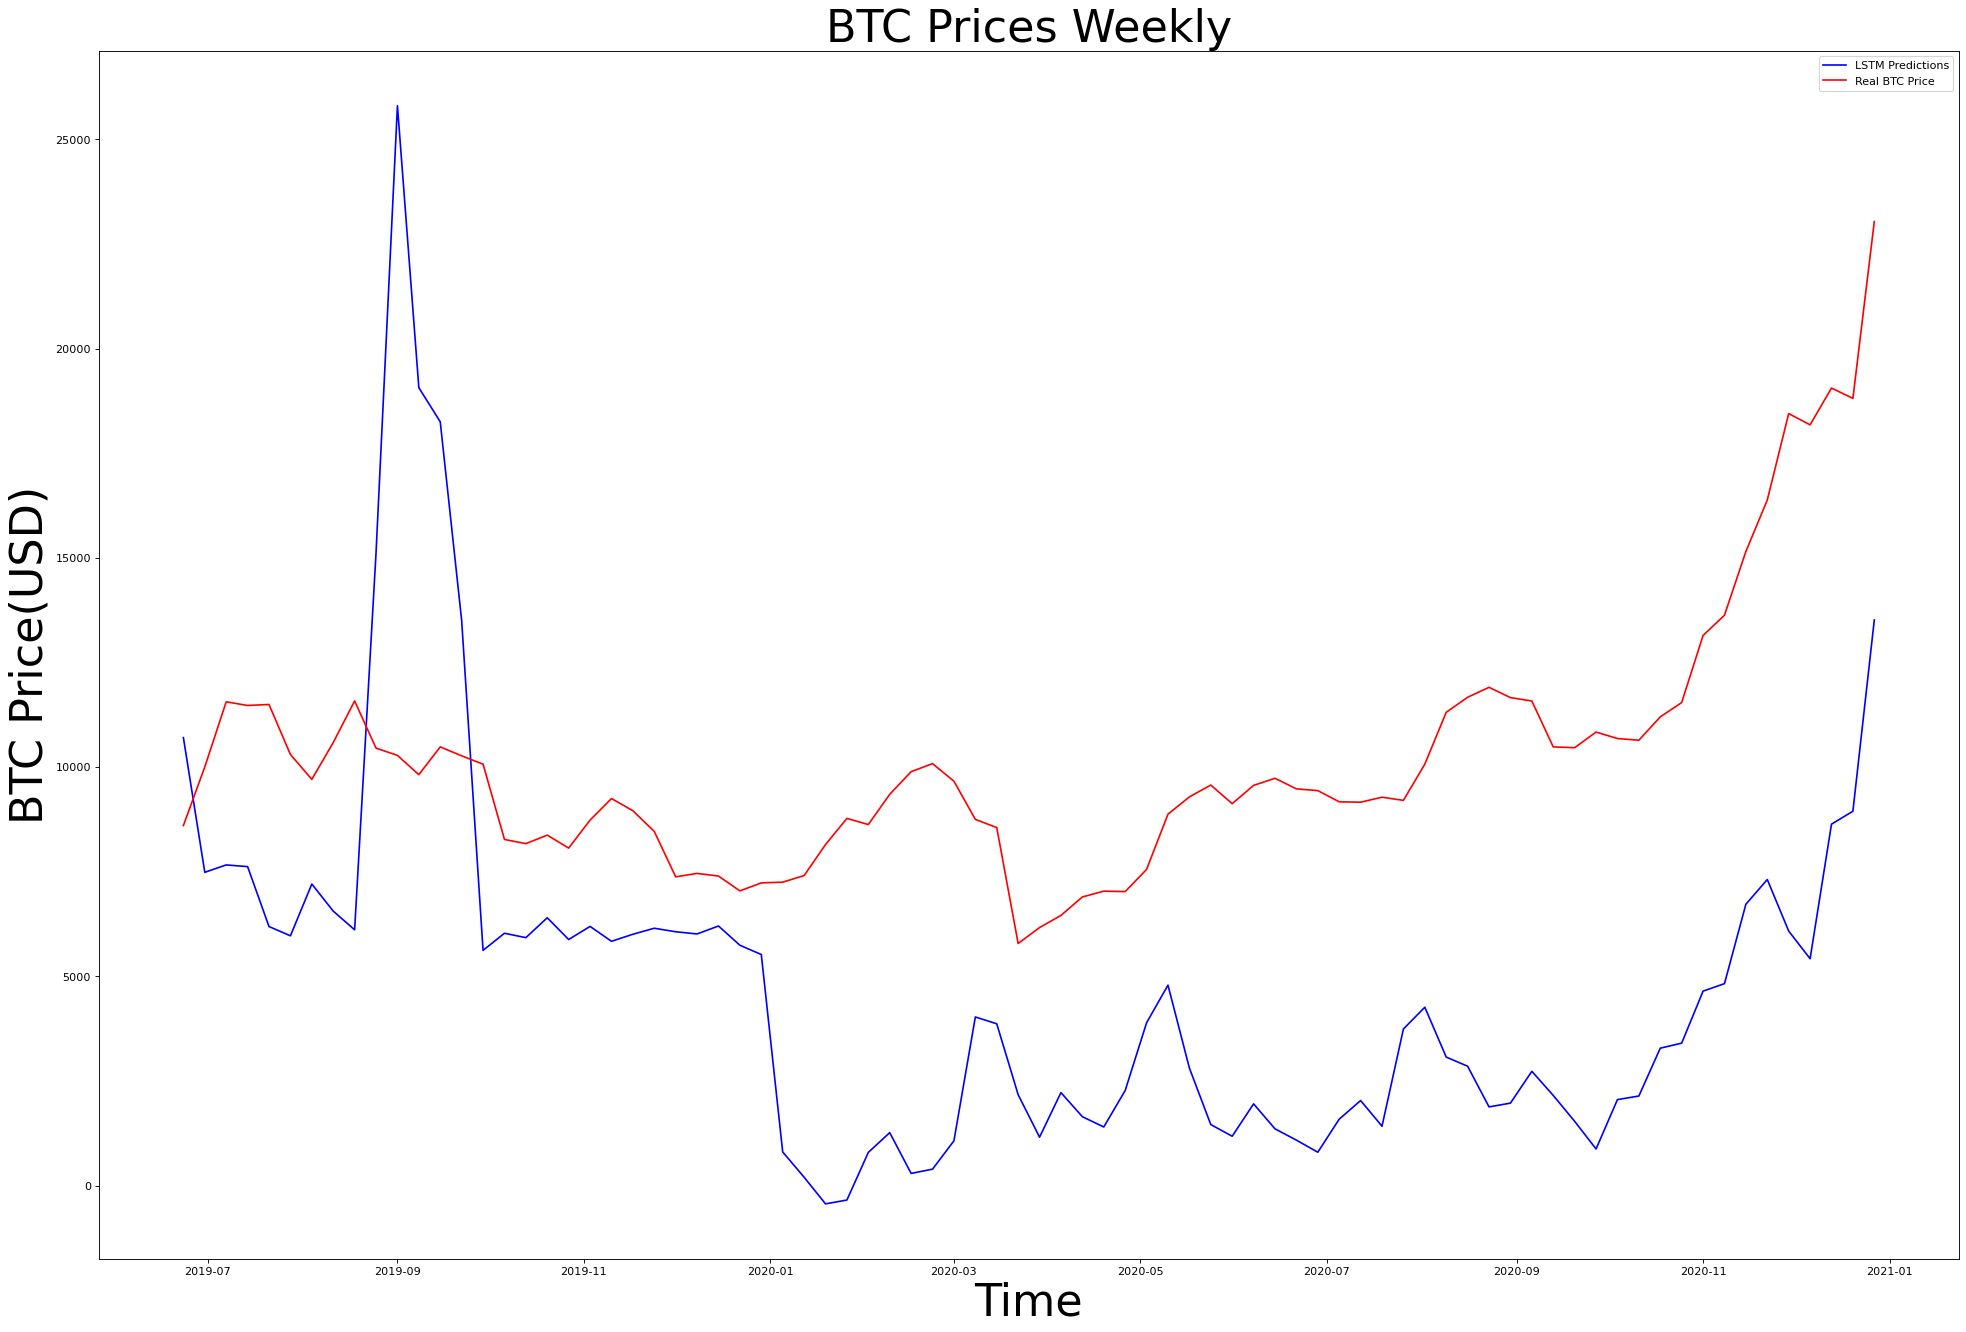

In [31]:
y_test_values = [float(i) for i in y_test]
# The Prices of Bitcoin over time
plt.figure(figsize=(30, 20), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(X_test.index,predicted_price, color='blue', label='LSTM Predictions')
plt.plot(X_test.index,y_test_values, color='red', label='Real BTC Price')
plt.title('BTC Prices Weekly', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend()
plt.show()

## Predicting the model without google trends as features

In [32]:
# Previous predicted prices were for feaures with google trends, now predicting for without google trends 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_second = MinMaxScaler()
min_max_scaler_y_second = MinMaxScaler()

In [33]:
# Turning input X_Train to appropriate shape for LSTM    ((n_samples, time_steps, features))
x_training_set = X_train_second.values
x_training_set = x_training_set[0:len(x_training_set)]

x_training_set = min_max_scaler_second.fit_transform(x_training_set)
x_training_set = x_training_set.reshape((x_training_set.shape[0], 1, x_training_set.shape[1]))
x_training_set

array([[[0.        , 0.        , 0.7       ]],

       [[0.        , 0.        , 0.93333333]],

       [[0.09090909, 0.        , 0.13333333]],

       [[0.09090909, 0.        , 0.36666667]],

       [[0.09090909, 0.        , 0.6       ]],

       [[0.09090909, 0.        , 0.83333333]],

       [[0.18181818, 0.        , 0.13333333]],

       [[0.18181818, 0.        , 0.36666667]],

       [[0.18181818, 0.        , 0.6       ]],

       [[0.18181818, 0.        , 0.83333333]],

       [[0.27272727, 0.        , 0.03333333]],

       [[0.27272727, 0.        , 0.26666667]],

       [[0.27272727, 0.        , 0.5       ]],

       [[0.27272727, 0.        , 0.73333333]],

       [[0.27272727, 0.        , 0.96666667]],

       [[0.36363636, 0.        , 0.2       ]],

       [[0.36363636, 0.        , 0.43333333]],

       [[0.36363636, 0.        , 0.66666667]],

       [[0.36363636, 0.        , 0.9       ]],

       [[0.45454545, 0.        , 0.1       ]],

       [[0.45454545, 0.        , 0.33333

In [34]:
y_train = pd.DataFrame(y_train_second)
list(y_train['Mean Prices'])
y_train_values = [float(i) for i in y_train['Mean Prices']]
y_train_values = np.array(y_train_values)
y_train_values = np.array(y_train_values)

y_train_values = np.reshape(y_train_values, (len(y_train_values), 1))
y_training_set = min_max_scaler_y_second.fit_transform(y_train_values)

In [35]:
# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, input_shape=(x_training_set.shape[1], x_training_set.shape[2])))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Using the training set to train the model
regressor.fit(x_training_set, y_training_set, batch_size = 5, epochs = 100)

Epoch 1/100
26/26 [==============================] - 2s 957us/step - loss: 0.1311
Epoch 2/100
26/26 [==============================] - 0s 838us/step - loss: 0.0598
Epoch 3/100
26/26 [==============================] - 0s 878us/step - loss: 0.0424
Epoch 4/100
26/26 [==============================] - 0s 918us/step - loss: 0.0453
Epoch 5/100
26/26 [==============================] - 0s 918us/step - loss: 0.0446
Epoch 6/100
26/26 [==============================] - 0s 918us/step - loss: 0.0388
Epoch 7/100
26/26 [==============================] - 0s 878us/step - loss: 0.0498
Epoch 8/100
26/26 [==============================] - 0s 918us/step - loss: 0.0556
Epoch 9/100
26/26 [==============================] - 0s 859us/step - loss: 0.0368
Epoch 10/100
26/26 [==============================] - 0s 997us/step - loss: 0.0393
Epoch 11/100
26/26 [==============================] - 0s 957us/step - loss: 0.0513
Epoch 12/100
26/26 [==============================] - 0s 918us/step - loss: 0.0412
Epoch 13/100


In [36]:
test_set = X_test_second.values

# Reshaping and scaling the inputs
inputs = np.reshape(test_set, (len(test_set), 3))
inputs = min_max_scaler_second.transform(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 3))
predicted_price = regressor.predict(inputs)
inputs = inputs.reshape((inputs.shape[0], 1, 3))
predicted_price = min_max_scaler_y_second.inverse_transform(predicted_price)
inputs

array([[[0.45454545, 1.        , 0.73333333]],

       [[0.45454545, 1.        , 0.96666667]],

       [[0.54545455, 1.        , 0.2       ]],

       [[0.54545455, 1.        , 0.43333333]],

       [[0.54545455, 1.        , 0.66666667]],

       [[0.54545455, 1.        , 0.9       ]],

       [[0.63636364, 1.        , 0.1       ]],

       [[0.63636364, 1.        , 0.33333333]],

       [[0.63636364, 1.        , 0.56666667]],

       [[0.63636364, 1.        , 0.8       ]],

       [[0.72727273, 1.        , 0.        ]],

       [[0.72727273, 1.        , 0.23333333]],

       [[0.72727273, 1.        , 0.46666667]],

       [[0.72727273, 1.        , 0.7       ]],

       [[0.72727273, 1.        , 0.93333333]],

       [[0.81818182, 1.        , 0.16666667]],

       [[0.81818182, 1.        , 0.4       ]],

       [[0.81818182, 1.        , 0.63333333]],

       [[0.81818182, 1.        , 0.86666667]],

       [[0.90909091, 1.        , 0.06666667]],

       [[0.90909091, 1.        , 0.3    

In [37]:
predicted_price

array([[ 4977.6836  ],
       [ 5003.9854  ],
       [ 4642.5435  ],
       [ 4661.6533  ],
       [ 4686.7876  ],
       [ 4718.253   ],
       [ 4356.4053  ],
       [ 4378.5366  ],
       [ 4406.729   ],
       [ 4441.465   ],
       [ 4086.2983  ],
       [ 4110.944   ],
       [ 4141.514   ],
       [ 4178.6523  ],
       [ 4222.8057  ],
       [ 3863.3706  ],
       [ 3896.6802  ],
       [ 3936.5076  ],
       [ 3983.4382  ],
       [ 3627.5652  ],
       [ 3662.333   ],
       [ 3703.3308  ],
       [ 3751.2993  ],
       [ 3412.2324  ],
       [ 3449.001   ],
       [ 3491.6992  ],
       [ 3541.1794  ],
       [ 3598.1282  ],
       [ 1810.8623  ],
       [ 1666.4728  ],
       [ 1536.4877  ],
       [ 1422.4889  ],
       [ 1445.1678  ],
       [ 1299.672   ],
       [ 1167.7819  ],
       [ 1051.191   ],
       [ 1059.8354  ],
       [  916.95416 ],
       [  787.30896 ],
       [  672.63617 ],
       [  574.4932  ],
       [  596.6934  ],
       [  465.33102 ],
       [  3

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted_price,squared=False)

10046.278075958615

In [39]:
mean_absolute_error(y_test,predicted_price)

8962.25268728175

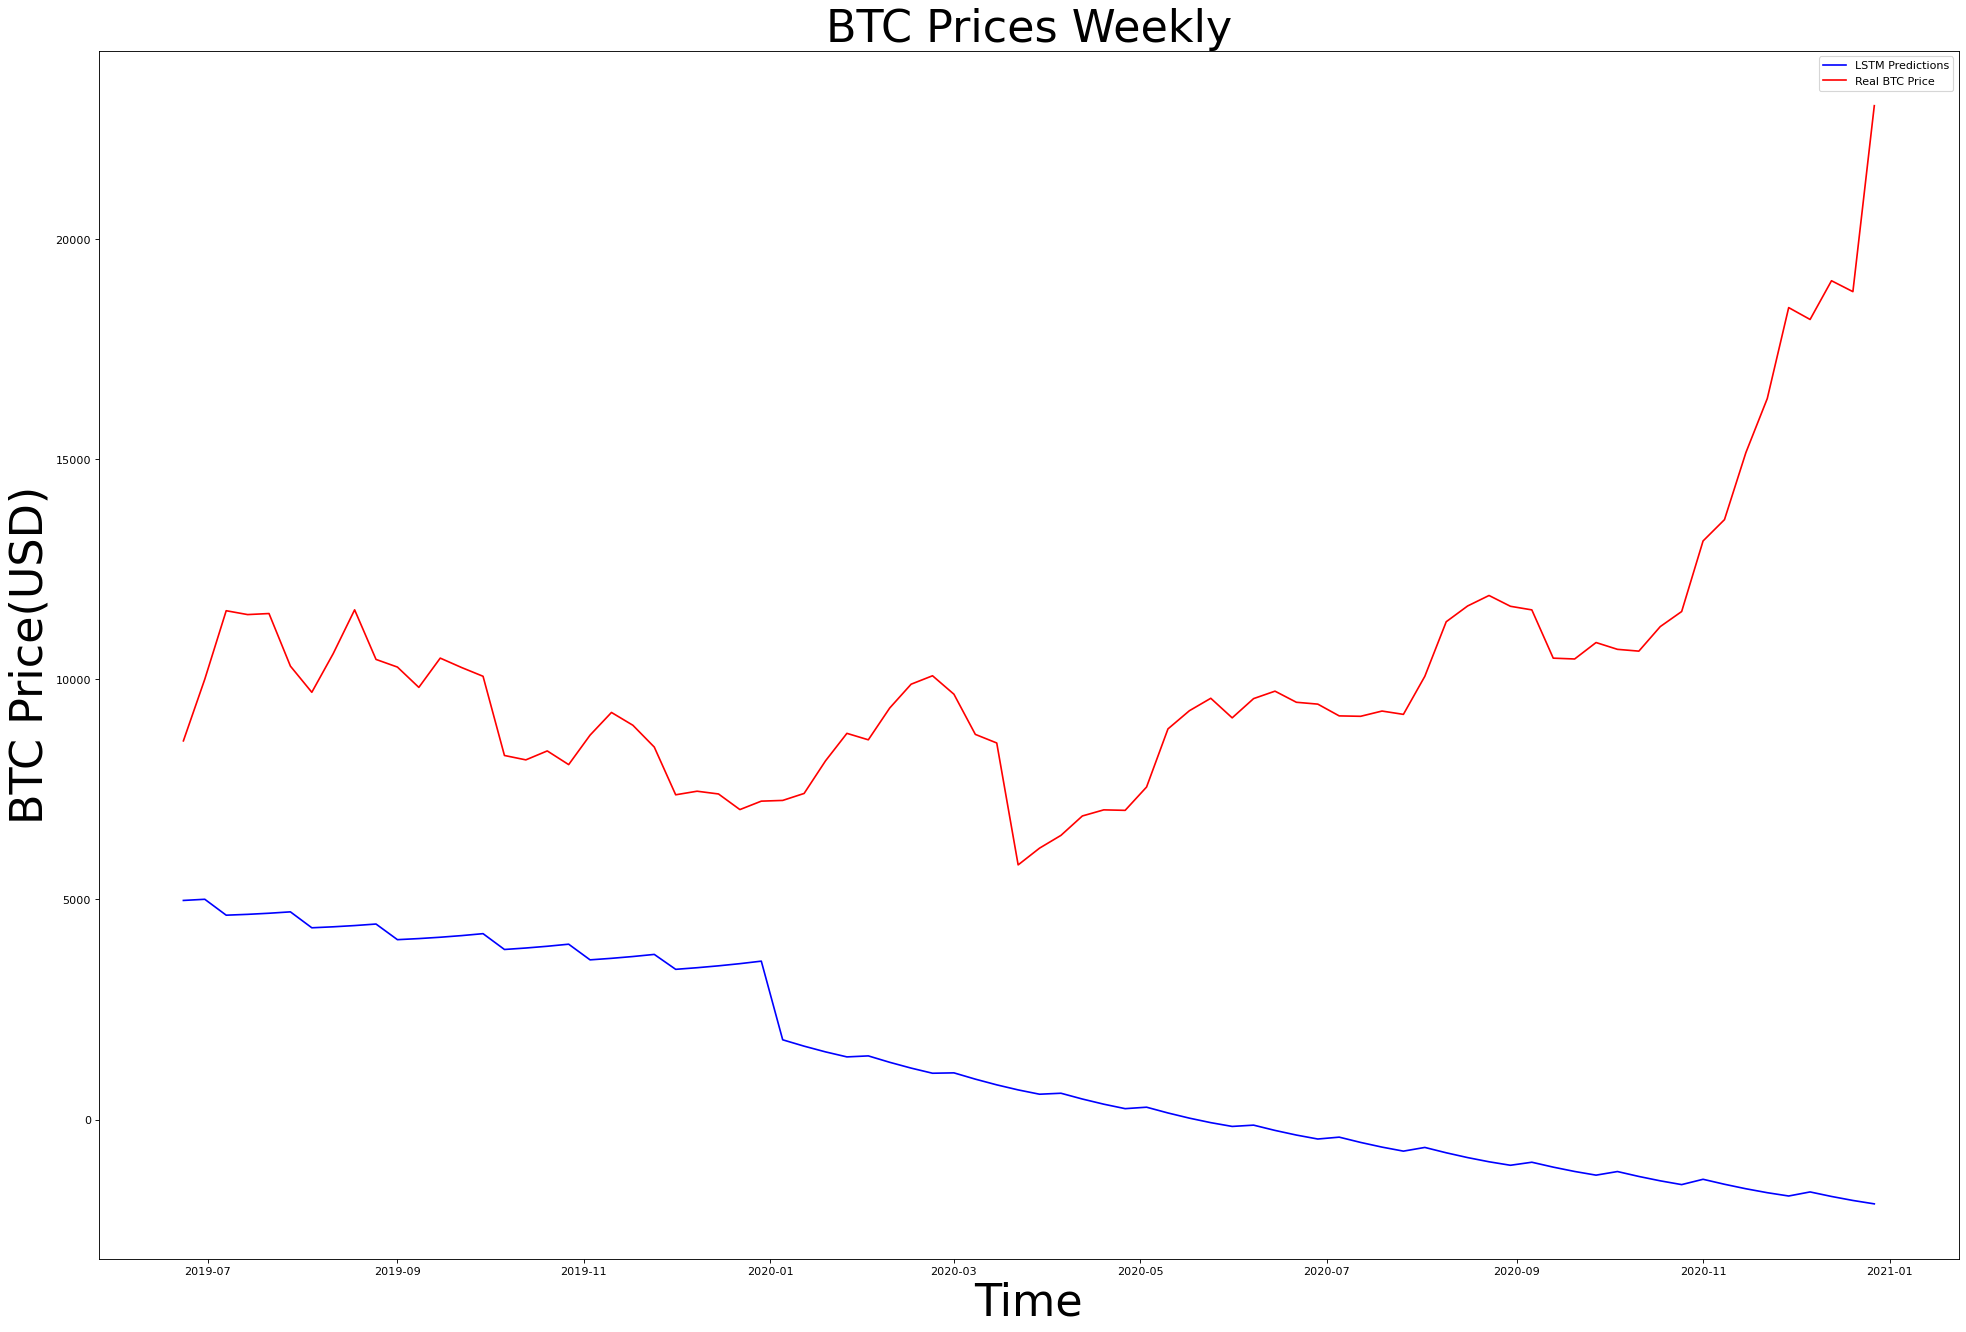

In [40]:
y_test_values = [float(i) for i in y_test]
# The Prices of Bitcoin over time
plt.figure(figsize=(30, 20), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(X_test.index,predicted_price, color='blue', label='LSTM Predictions')
plt.plot(X_test.index,y_test_values, color='red', label='Real BTC Price')
plt.title('BTC Prices Weekly', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend()
plt.show()

<ipython-input-41-642bf5ccaf3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_x['Mean Prices'] = y_train['Mean Prices']


<AxesSubplot:xlabel='Hafta', ylabel='Hafta'>

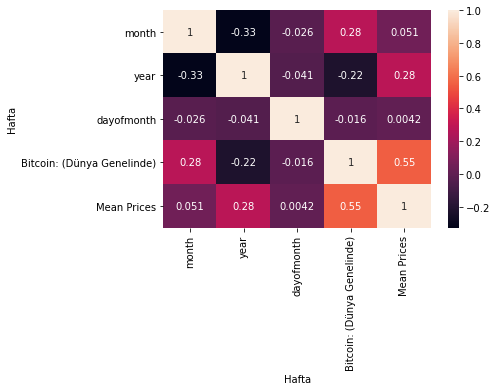

In [41]:
# To see the correlation values
dummy_x = X_train
dummy_x['Mean Prices'] = y_train['Mean Prices']
sns.heatmap(dummy_x.corr(),annot = True)


## A huge difference could be seen by predicting with google trends and predicting without google trends

Now prices will be shifted and yesterdays price will be used as a feature on the models

# Now k fold cross validation will be used, using rolling forecast origin and sliding window methods

### Rolling Forecast Origin Implementation

In [42]:
def roll_forecast_orig(train,min_train_size,horizon):
    for i in range(len(train)-min_train_size-horizon+1):
        split_train = train[:min_train_size+i]
        split_val = train[min_train_size+i:min_train_size+i+horizon]
        yield split_train,split_val
        
# Simple example implementation
series_ex = [2300,5000,6000,9000,2323,5644,7878,4444,2342,3000,3500,5000,7000,8000,9000,8000]
test=series_ex[-2:]
train = series_ex[:-2]

rolling_data = roll_forecast_orig(train,min_train_size=3,horizon=2)

print('Training Set: {0}'.format(train))
print('Test Set: {0}'.format(test))

print('\n')

i= 0
for train_c, val_c in rolling_data:
    print(f'Count[{i+1}]')
    print(f'Train:\t[{train_c}]')
    print(f'Val:\t[{val_c}]')
    print('-------')
    i += 1

Training Set: [2300, 5000, 6000, 9000, 2323, 5644, 7878, 4444, 2342, 3000, 3500, 5000, 7000, 8000]
Test Set: [9000, 8000]


Count[1]
Train:	[[2300, 5000, 6000]]
Val:	[[9000, 2323]]
-------
Count[2]
Train:	[[2300, 5000, 6000, 9000]]
Val:	[[2323, 5644]]
-------
Count[3]
Train:	[[2300, 5000, 6000, 9000, 2323]]
Val:	[[5644, 7878]]
-------
Count[4]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644]]
Val:	[[7878, 4444]]
-------
Count[5]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644, 7878]]
Val:	[[4444, 2342]]
-------
Count[6]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644, 7878, 4444]]
Val:	[[2342, 3000]]
-------
Count[7]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644, 7878, 4444, 2342]]
Val:	[[3000, 3500]]
-------
Count[8]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644, 7878, 4444, 2342, 3000]]
Val:	[[3500, 5000]]
-------
Count[9]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644, 7878, 4444, 2342, 3000, 3500]]
Val:	[[5000, 7000]]
-------
Count[10]
Train:	[[2300, 5000, 6000, 9000, 2323, 5644, 7878, 4444, 2342, 30

In [43]:
# Splitting the data to train and test based on the prediction day we want

date_string = "21 June, 2019"
#possible parameter %H:%M:%S
dt_onject_split = dt.datetime.strptime(date_string, "%d %B, %Y").date()
data_train = trends_weekly_df.loc[trends_weekly_df.index <= dt_onject_split].copy()
data_test = trends_weekly_df.loc[trends_weekly_df.index > dt_onject_split].copy()

print("Data train shape",data_train.shape)
print("Data test shape",data_test.shape)

Data train shape (126, 3)
Data test shape (80, 3)


In [44]:
data_train

Hafta,Bitcoin: (Dünya Genelinde),Mean Prices,Hafta Feature
2017-01-22,5,1001.984641,2017-01-22
2017-01-29,5,858.134107,2017-01-29
2017-02-05,5,870.803750,2017-02-05
2017-02-12,5,914.227679,2017-02-12
2017-02-19,5,963.755536,2017-02-19
...,...,...,...
2019-05-19,14,6647.705639,2019-05-19
2019-05-26,16,7800.502763,2019-05-26
2019-06-02,13,8167.206495,2019-06-02
2019-06-09,12,8571.252718,2019-06-09


In [45]:
def create_features_with_google_trends_for_df(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Hafta'] = df.index
    df['Hafta'] = pd.to_datetime(df['Hafta'], errors='coerce')
    df['month'] = df['Hafta'].dt.month
    df['year'] = df['Hafta'].dt.year
    df['dayofmonth'] = df['Hafta'].dt.day

    
    X = df[['month','year','dayofmonth','Bitcoin: (Dünya Genelinde)']]
    if label:
        y = df[label]
        return X, y
    return X

df_x, df_y = create_features_with_google_trends_for_df(data_train,"Mean Prices")
df_x_test, df_y_test = create_features_with_google_trends_for_df(data_test,"Mean Prices")

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Turning input X_Train to appropriate shape for LSTM    ((n_samples, time_steps, features))
x_training_set = df_x
x_training_set = df_x[0:len(x_training_set)]

y_train = pd.DataFrame(df_y)
list(y_train['Mean Prices'])
y_train_values = [float(i) for i in y_train['Mean Prices']]
y_train_values = np.array(y_train_values)
y_train_values = np.array(y_train_values)

y_train_values = np.reshape(y_train_values, (len(y_train_values), 1))
y_training_set = y_train_values

x_training_set

Hafta,month,year,dayofmonth,Bitcoin: (Dünya Genelinde)
2017-01-22,1,2017,22,5
2017-01-29,1,2017,29,5
2017-02-05,2,2017,5,5
2017-02-12,2,2017,12,5
2017-02-19,2,2017,19,5
...,...,...,...,...
2019-05-19,5,2019,19,14
2019-05-26,5,2019,26,16
2019-06-02,6,2019,2,13
2019-06-09,6,2019,9,12


In [48]:
# Initializing rolling data objects
rolling_data_x = roll_forecast_orig(x_training_set,min_train_size=3,horizon=2)
rolling_data_y = roll_forecast_orig(list(y_training_set),min_train_size=3,horizon=2)


cv_x_train_list = []
cv_x_test_list = []
i= 0
for train_c, val_c in rolling_data_x:
    print(f'Count[{i+1}]')
    print(f'Train:\t[{train_c}]')
    print(f'Val:\t[{val_c}]')
    print('-------')
    cv_x_train_list.append(train_c)
    cv_x_test_list.append(val_c)
    i += 1

Count[1]
Train:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-01-22      1  2017          22                           5
2017-01-29      1  2017          29                           5
2017-02-05      2  2017           5                           5]
Val:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-02-12      2  2017          12                           5
2017-02-19      2  2017          19                           5]
-------
Count[2]
Train:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-01-22      1  2017          22                           5
2017-01-29      1  2017          29                           5
2017-02-05      2  2017           5                           5
2017-02-12      2  2017          12                           5]
Val:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-02-19      2  2017          19                           5
2017-02-26      2  2017          26            

2017-10-22     10  2017          22                          20]
Val:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-10-29     10  2017          29                          26
2017-11-05     11  2017           5                          28]
-------
Count[39]
Train:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-01-22      1  2017          22                           5
2017-01-29      1  2017          29                           5
2017-02-05      2  2017           5                           5
2017-02-12      2  2017          12                           5
2017-02-19      2  2017          19                           5
2017-02-26      2  2017          26                           7
2017-03-05      3  2017           5                           7
2017-03-12      3  2017          12                           6
2017-03-19      3  2017          19                           6
2017-03-26      3  2017          26                           5
2017-0

Train:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-01-22      1  2017          22                           5
2017-01-29      1  2017          29                           5
2017-02-05      2  2017           5                           5
2017-02-12      2  2017          12                           5
2017-02-19      2  2017          19                           5
2017-02-26      2  2017          26                           7
2017-03-05      3  2017           5                           7
2017-03-12      3  2017          12                           6
2017-03-19      3  2017          19                           6
2017-03-26      3  2017          26                           5
2017-04-02      4  2017           2                           5
2017-04-09      4  2017           9                           5
2017-04-16      4  2017          16                           5
2017-04-23      4  2017          23                           6
2017-04-30      4  2017         

2018-06-03      6  2018           3                          10]
-------
Count[69]
Train:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-01-22      1  2017          22                           5
2017-01-29      1  2017          29                           5
2017-02-05      2  2017           5                           5
2017-02-12      2  2017          12                           5
2017-02-19      2  2017          19                           5
...           ...   ...         ...                         ...
2018-04-29      4  2018          29                          13
2018-05-06      5  2018           6                          13
2018-05-13      5  2018          13                          11
2018-05-20      5  2018          20                          11
2018-05-27      5  2018          27                          11

[71 rows x 4 columns]]
Val:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2018-06-03      6  2018           3            

[102 rows x 4 columns]]
Val:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2019-01-06      1  2019           6                           9
2019-01-13      1  2019          13                           8]
-------
Count[101]
Train:	[Hafta       month  year  dayofmonth  Bitcoin: (Dünya Genelinde)
2017-01-22      1  2017          22                           5
2017-01-29      1  2017          29                           5
2017-02-05      2  2017           5                           5
2017-02-12      2  2017          12                           5
2017-02-19      2  2017          19                           5
...           ...   ...         ...                         ...
2018-12-09     12  2018           9                          11
2018-12-16     12  2018          16                          12
2018-12-23     12  2018          23                          10
2018-12-30     12  2018          30                           9
2019-01-06      1  2019           6           

In [49]:
cv_y_train_list = []
cv_y_test_list = []
i= 0
for train_c, val_c in rolling_data_y:
    print(f'Count[{i+1}]')
    print(f'Train:\t[{train_c}]')
    print(f'Val:\t[{val_c}]')
    print('-------')
    cv_y_train_list.append(train_c)
    cv_y_test_list.append(val_c)
    i += 1

Count[1]
Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375])]]
Val:	[[array([914.22767857]), array([963.75553571])]]
-------
Count[2]
Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857])]]
Val:	[[array([963.75553571]), array([1027.17464143])]]
-------
Count[3]
Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571])]]
Val:	[[array([1027.17464143]), array([1017.61857143])]]
-------
Count[4]
Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143])]]
Val:	[[array([1017.61857143]), array([1112.91392714])]]
-------
Count[5]
Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143])]]
Val:	[[array([1112.91392714]), array([1212.71057])]]
-------
Count[6]
Train:	[[array

Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143]), array([1112.91392714]), array([1212.71057]), array([1217.40271143]), array([1192.34642571]), array([1023.57671286]), array([1020.84085429]), array([1147.88914286]), array([1203.42628286]), array([1221.29832]), array([1277.53339286]), array([1447.72999857]), array([1659.52982143]), array([1803.61946429]), array([2287.14303286]), array([2324.56160429]), array([2756.75232143]), array([2696.07982]), array([2710.04499857]), array([2559.42803143]), array([2559.18375]), array([2377.13624857]), array([2343.62089143]), array([2700.38053429]), array([2816.55375]), array([3420.28410714]), array([4219.52803571]), array([4179.86874857]), array([4593.25071429]), array([4485.21946429]), array([3955.74857]), array([3763.375]), array([3982.4425]), array([4332.70642714]), array([4979.38035429]), array([5705.20053571]), array([5793.775])

Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143]), array([1112.91392714]), array([1212.71057]), array([1217.40271143]), array([1192.34642571]), array([1023.57671286]), array([1020.84085429]), array([1147.88914286]), array([1203.42628286]), array([1221.29832]), array([1277.53339286]), array([1447.72999857]), array([1659.52982143]), array([1803.61946429]), array([2287.14303286]), array([2324.56160429]), array([2756.75232143]), array([2696.07982]), array([2710.04499857]), array([2559.42803143]), array([2559.18375]), array([2377.13624857]), array([2343.62089143]), array([2700.38053429]), array([2816.55375]), array([3420.28410714]), array([4219.52803571]), array([4179.86874857]), array([4593.25071429]), array([4485.21946429]), array([3955.74857]), array([3763.375]), array([3982.4425]), array([4332.70642714]), array([4979.38035429]), array([5705.20053571]), array([5793.775])

Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143]), array([1112.91392714]), array([1212.71057]), array([1217.40271143]), array([1192.34642571]), array([1023.57671286]), array([1020.84085429]), array([1147.88914286]), array([1203.42628286]), array([1221.29832]), array([1277.53339286]), array([1447.72999857]), array([1659.52982143]), array([1803.61946429]), array([2287.14303286]), array([2324.56160429]), array([2756.75232143]), array([2696.07982]), array([2710.04499857]), array([2559.42803143]), array([2559.18375]), array([2377.13624857]), array([2343.62089143]), array([2700.38053429]), array([2816.55375]), array([3420.28410714]), array([4219.52803571]), array([4179.86874857]), array([4593.25071429]), array([4485.21946429]), array([3955.74857]), array([3763.375]), array([3982.4425]), array([4332.70642714]), array([4979.38035429]), array([5705.20053571]), array([5793.775])

Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143]), array([1112.91392714]), array([1212.71057]), array([1217.40271143]), array([1192.34642571]), array([1023.57671286]), array([1020.84085429]), array([1147.88914286]), array([1203.42628286]), array([1221.29832]), array([1277.53339286]), array([1447.72999857]), array([1659.52982143]), array([1803.61946429]), array([2287.14303286]), array([2324.56160429]), array([2756.75232143]), array([2696.07982]), array([2710.04499857]), array([2559.42803143]), array([2559.18375]), array([2377.13624857]), array([2343.62089143]), array([2700.38053429]), array([2816.55375]), array([3420.28410714]), array([4219.52803571]), array([4179.86874857]), array([4593.25071429]), array([4485.21946429]), array([3955.74857]), array([3763.375]), array([3982.4425]), array([4332.70642714]), array([4979.38035429]), array([5705.20053571]), array([5793.775])

Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143]), array([1112.91392714]), array([1212.71057]), array([1217.40271143]), array([1192.34642571]), array([1023.57671286]), array([1020.84085429]), array([1147.88914286]), array([1203.42628286]), array([1221.29832]), array([1277.53339286]), array([1447.72999857]), array([1659.52982143]), array([1803.61946429]), array([2287.14303286]), array([2324.56160429]), array([2756.75232143]), array([2696.07982]), array([2710.04499857]), array([2559.42803143]), array([2559.18375]), array([2377.13624857]), array([2343.62089143]), array([2700.38053429]), array([2816.55375]), array([3420.28410714]), array([4219.52803571]), array([4179.86874857]), array([4593.25071429]), array([4485.21946429]), array([3955.74857]), array([3763.375]), array([3982.4425]), array([4332.70642714]), array([4979.38035429]), array([5705.20053571]), array([5793.775])

Train:	[[array([1001.98464143]), array([858.13410714]), array([870.80375]), array([914.22767857]), array([963.75553571]), array([1027.17464143]), array([1017.61857143]), array([1112.91392714]), array([1212.71057]), array([1217.40271143]), array([1192.34642571]), array([1023.57671286]), array([1020.84085429]), array([1147.88914286]), array([1203.42628286]), array([1221.29832]), array([1277.53339286]), array([1447.72999857]), array([1659.52982143]), array([1803.61946429]), array([2287.14303286]), array([2324.56160429]), array([2756.75232143]), array([2696.07982]), array([2710.04499857]), array([2559.42803143]), array([2559.18375]), array([2377.13624857]), array([2343.62089143]), array([2700.38053429]), array([2816.55375]), array([3420.28410714]), array([4219.52803571]), array([4179.86874857]), array([4593.25071429]), array([4485.21946429]), array([3955.74857]), array([3763.375]), array([3982.4425]), array([4332.70642714]), array([4979.38035429]), array([5705.20053571]), array([5793.775])

In [50]:
def find_least_error_hyperparameters(dictionary):
    min_index = 0
    key_list = []
    value_list = []
    for key,item in dictionary.items():
        key_list.append(key)
        value_list.append(item)
    temp_index = 0
    temp = value_list[0]
    for i in range(0,len(value_list)):
        if temp > value_list[i]:
            temp_index = i
            temp = value_list[i]
    return key_list[temp_index], temp

def root_mean_squared_sum_of_list(list_value):
    sum_of_list_as_root_mean_squared = 0
    for i in list_value:
        sum_of_list_as_root_mean_squared += np.sqrt(i)
    return sum_of_list_as_root_mean_squared





def calculate_cv_scores(cv_x_test_list_param ,cv_y_test_param, metric,cv_x_train_list_param,cv_y_train_param,unit_count,batch_count,epoch_count):
    cv_scores = []
    i=0
    for i in range(len(cv_x_train_list_param)):
        
        fold_min_max_scaler = MinMaxScaler()
        fold_min_max_scaler_y = MinMaxScaler()
        
        
        cv_x_train_list_param[i] = fold_min_max_scaler.fit_transform(cv_x_train_list_param[i])
        cv_y_train_param[i] = fold_min_max_scaler_y.fit_transform(cv_y_train_param[i])
        
        cv_x_train_list_param[i] = cv_x_train_list_param[i].reshape((cv_x_train_list_param[i].shape[0], 1, cv_x_train_list_param[i].shape[1]))
        
        # Initialize the RNN
        regressor = Sequential()

        # Adding the input layer and the LSTM layer
        regressor.add(LSTM(units = unit_count, input_shape=(cv_x_train_list_param[i].shape[1], cv_x_train_list_param[i].shape[2])))

        # Adding the output layer
        regressor.add(Dense(units = 1))

        # Compiling the RNN
        regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

        # Using the training set to train the model
        regressor.fit(cv_x_train_list_param[i], cv_y_train_param[i], batch_size = batch_count, epochs = epoch_count)
        
        
        inputs = cv_x_test_list_param[i]
        # Reshaping and scaling the inputs
        inputs = np.reshape(inputs, (len(inputs), 4))
        inputs = fold_min_max_scaler.transform(inputs)
        inputs = inputs.reshape((inputs.shape[0], 1, 4))
        predicted_price = regressor.predict(inputs)
        predicted_price = fold_min_max_scaler_y.inverse_transform(predicted_price)
        
        
        score = metric(y_true = cv_y_test_param[i], y_pred = predicted_price)
        cv_scores.append(score)
        i += 1
    return root_mean_squared_sum_of_list(np.array(cv_scores)) 
    

# Cross Validation function
def cross_val_score(cv_x_train_list, cv_x_test_list ,cv_y_train,cv_y_test, metric):

    parameters_dict = {"batch_size"    : [3,4 ] ,
     "epochs"        : [ 50,60],
     "units" : [ 30,40 ]
                      }
    
    cv_scores_dict = {}
    i_num = 0
    for batch_count in parameters_dict['batch_size']:
        for epoch_count in parameters_dict['epochs']:
            for unit_count in parameters_dict['units']:
                # Various param variables
                cv_x_test_list_temp = cv_x_test_list
                cv_y_test_temp = cv_y_test
                cv_x_train_list_temp = cv_x_train_list
                cv_y_train_temp = cv_y_train
                
                hyper_parameter_string = "batch_size "+str(batch_count)+" epochs "+str(epoch_count)+" units "+str(unit_count)
                cv_score_of_model = calculate_cv_scores(cv_x_test_list_temp,cv_y_test_temp, metric,cv_x_train_list_temp,cv_y_train_temp,unit_count,batch_count,epoch_count)
                i_num = i_num + 1
                print(str(i_num)+" Error of the model "+ hyper_parameter_string ,cv_score_of_model)
                cv_scores_dict[hyper_parameter_string] = cv_score_of_model
    return cv_scores_dict

In [51]:
# stops after the first iteration ValueError: Found array with dim 3. MinMaxScaler expected <= 2.
from sklearn.metrics import mean_absolute_error
cv_sc = cross_val_score(cv_x_train_list , cv_x_test_list  ,cv_y_train_list, cv_y_test_list , mean_absolute_error)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.3595
Epoch 2/50
1/1 [==============================] - 0s 999us/step - loss: 0.3557
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3520
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3483
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3447
Epoch 6/50
1/1 [==============================] - 0s 997us/step - loss: 0.3411
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3376
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 0.3341
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3307
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3274
Epoch 11/50
1/1 [==============================] - 0s 996us/step - loss: 0.3241
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.3209
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - los

2/2 [==============================] - 0s 997us/step - loss: 0.0923
Epoch 1/50
3/3 [==============================] - 2s 1ms/step - loss: 0.4030
Epoch 2/50
3/3 [==============================] - 0s 997us/step - loss: 0.4346
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 0.4126
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 0.4486
Epoch 5/50
3/3 [==============================] - 0s 1ms/step - loss: 0.3049
Epoch 6/50
3/3 [==============================] - 0s 997us/step - loss: 0.4022
Epoch 7/50
3/3 [==============================] - 0s 999us/step - loss: 0.4059
Epoch 8/50
3/3 [==============================] - 0s 1ms/step - loss: 0.3420
Epoch 9/50
3/3 [==============================] - 0s 1ms/step - loss: 0.3045
Epoch 10/50
3/3 [==============================] - 0s 1ms/step - loss: 0.2881
Epoch 11/50
3/3 [==============================] - 0s 997us/step - loss: 0.3378
Epoch 12/50
3/3 [==============================] - 0s 1ms/step - loss: 0.31

3/3 [==============================] - 0s 2ms/step - loss: 0.0728
Epoch 37/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0820
Epoch 38/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0796
Epoch 39/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0721
Epoch 40/50
3/3 [==============================] - 0s 994us/step - loss: 0.0653
Epoch 41/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0742
Epoch 42/50
3/3 [==============================] - 0s 997us/step - loss: 0.0608
Epoch 43/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0527
Epoch 44/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0788
Epoch 45/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 46/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0714
Epoch 47/50
3/3 [==============================] - 0s 1ms/step - loss: 0.0521
Epoch 48/50
3/3 [==============================] - 0s 1ms/step - loss: 0

4/4 [==============================] - 0s 1ms/step - loss: 0.0611
Epoch 22/50
4/4 [==============================] - 0s 997us/step - loss: 0.0631
Epoch 23/50
4/4 [==============================] - 0s 997us/step - loss: 0.0754
Epoch 24/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0725
Epoch 25/50
4/4 [==============================] - 0s 997us/step - loss: 0.0608
Epoch 26/50
4/4 [==============================] - 0s 997us/step - loss: 0.0783
Epoch 27/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 28/50
4/4 [==============================] - 0s 997us/step - loss: 0.0808
Epoch 29/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0703
Epoch 30/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0565
Epoch 31/50
4/4 [==============================] - 0s 1ms/step - loss: 0.0699
Epoch 32/50
4/4 [==============================] - 0s 997us/step - loss: 0.0577
Epoch 33/50
4/4 [==============================] - 0s 2ms/step -

5/5 [==============================] - 0s 1ms/step - loss: 0.0756
Epoch 1/50
5/5 [==============================] - 2s 1ms/step - loss: 0.3184
Epoch 2/50
5/5 [==============================] - 0s 997us/step - loss: 0.3438
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2219
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2793
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.3299
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1552
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2212
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1385
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2000
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1580
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1638
Epoch 12/50
5/5 [==============================] - 0s 1ms/step - loss: 0.1454
Epoch

6/6 [==============================] - 0s 1ms/step - loss: 0.0426
Epoch 21/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0439
Epoch 22/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 23/50
6/6 [==============================] - 0s 997us/step - loss: 0.0457
Epoch 24/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 25/50
6/6 [==============================] - 0s 997us/step - loss: 0.0373
Epoch 26/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 27/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 28/50
6/6 [==============================] - 0s 1ms/step - loss: 0.0550
Epoch 29/50
6/6 [==============================] - 0s 997us/step - loss: 0.0409
Epoch 30/50
6/6 [==============================] - 0s 997us/step - loss: 0.0475
Epoch 31/50
6/6 [==============================] - 0s 997us/step - loss: 0.0368
Epoch 32/50
6/6 [==============================] - 0s 1ms/step - l

7/7 [==============================] - 0s 998us/step - loss: 0.0211
Epoch 49/50
7/7 [==============================] - 0s 997us/step - loss: 0.0225
Epoch 50/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 1/50
7/7 [==============================] - 2s 997us/step - loss: 0.2018
Epoch 2/50
7/7 [==============================] - 0s 831us/step - loss: 0.1533
Epoch 3/50
7/7 [==============================] - 0s 996us/step - loss: 0.1723
Epoch 4/50
7/7 [==============================] - 0s 831us/step - loss: 0.0800
Epoch 5/50
7/7 [==============================] - 0s 831us/step - loss: 0.1190
Epoch 6/50
7/7 [==============================] - 0s 997us/step - loss: 0.0446
Epoch 7/50
7/7 [==============================] - 0s 997us/step - loss: 0.0420
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 9/50
7/7 [==============================] - 0s 831us/step - loss: 0.0888
Epoch 10/50
7/7 [==============================] - 0s 997us/step 

8/8 [==============================] - 0s 855us/step - loss: 0.0558
Epoch 17/50
8/8 [==============================] - 0s 855us/step - loss: 0.0600
Epoch 18/50
8/8 [==============================] - 0s 997us/step - loss: 0.0901
Epoch 19/50
8/8 [==============================] - 0s 997us/step - loss: 0.0601
Epoch 20/50
8/8 [==============================] - 0s 854us/step - loss: 0.0601
Epoch 21/50
8/8 [==============================] - 0s 855us/step - loss: 0.0504
Epoch 22/50
8/8 [==============================] - 0s 855us/step - loss: 0.0381
Epoch 23/50
8/8 [==============================] - 0s 855us/step - loss: 0.0627
Epoch 24/50
8/8 [==============================] - 0s 855us/step - loss: 0.0647
Epoch 25/50
8/8 [==============================] - 0s 712us/step - loss: 0.0553
Epoch 26/50
8/8 [==============================] - 0s 855us/step - loss: 0.0276
Epoch 27/50
8/8 [==============================] - 0s 855us/step - loss: 0.0461
Epoch 28/50
8/8 [==============================] - 0

Epoch 1/50
9/9 [==============================] - 2s 1ms/step - loss: 0.3462
Epoch 2/50
9/9 [==============================] - 0s 997us/step - loss: 0.2527
Epoch 3/50
9/9 [==============================] - 0s 997us/step - loss: 0.2075
Epoch 4/50
9/9 [==============================] - 0s 1ms/step - loss: 0.1453
Epoch 5/50
9/9 [==============================] - 0s 997us/step - loss: 0.1197
Epoch 6/50
9/9 [==============================] - 0s 997us/step - loss: 0.1080
Epoch 7/50
9/9 [==============================] - 0s 998us/step - loss: 0.1100
Epoch 8/50
9/9 [==============================] - 0s 997us/step - loss: 0.0990
Epoch 9/50
9/9 [==============================] - 0s 1ms/step - loss: 0.1241
Epoch 10/50
9/9 [==============================] - 0s 997us/step - loss: 0.0923
Epoch 11/50
9/9 [==============================] - 0s 1ms/step - loss: 0.0853
Epoch 12/50
9/9 [==============================] - 0s 997us/step - loss: 0.0740
Epoch 13/50
9/9 [==============================] - 0s 997

9/9 [==============================] - 0s 748us/step - loss: 0.0400
Epoch 46/50
9/9 [==============================] - 0s 748us/step - loss: 0.0276
Epoch 47/50
9/9 [==============================] - 0s 997us/step - loss: 0.0270
Epoch 48/50
9/9 [==============================] - 0s 873us/step - loss: 0.0549
Epoch 49/50
9/9 [==============================] - 0s 873us/step - loss: 0.0302
Epoch 50/50
9/9 [==============================] - 0s 872us/step - loss: 0.0343
Epoch 1/50
10/10 [==============================] - 2s 997us/step - loss: 0.1692
Epoch 2/50
10/10 [==============================] - 0s 997us/step - loss: 0.1827
Epoch 3/50
10/10 [==============================] - 0s 997us/step - loss: 0.1248
Epoch 4/50
10/10 [==============================] - 0s 997us/step - loss: 0.0881
Epoch 5/50
10/10 [==============================] - 0s 997us/step - loss: 0.1007
Epoch 6/50
10/10 [==============================] - 0s 997us/step - loss: 0.0705
Epoch 7/50
10/10 [============================

11/11 [==============================] - 0s 1ms/step - loss: 0.0702
Epoch 10/50
11/11 [==============================] - 0s 997us/step - loss: 0.0702
Epoch 11/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0693
Epoch 12/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0787
Epoch 13/50
11/11 [==============================] - 0s 997us/step - loss: 0.0562
Epoch 14/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0685
Epoch 15/50
11/11 [==============================] - 0s 997us/step - loss: 0.0577
Epoch 16/50
11/11 [==============================] - 0s 997us/step - loss: 0.0623
Epoch 17/50
11/11 [==============================] - 0s 997us/step - loss: 0.0558
Epoch 18/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0575
Epoch 19/50
11/11 [==============================] - 0s 997us/step - loss: 0.0465
Epoch 20/50
11/11 [==============================] - 0s 997us/step - loss: 0.0547
Epoch 21/50
11/11 [===================

12/12 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 33/50
12/12 [==============================] - 0s 997us/step - loss: 0.0157
Epoch 34/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 35/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 36/50
12/12 [==============================] - 0s 997us/step - loss: 0.0190
Epoch 37/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 38/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 39/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 40/50
12/12 [==============================] - 0s 997us/step - loss: 0.0164
Epoch 41/50
12/12 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 42/50
12/12 [==============================] - 0s 907us/step - loss: 0.0136
Epoch 43/50
12/12 [==============================] - 0s 907us/step - loss: 0.0142
Epoch 44/50
12/12 [=======================

Epoch 1/50
13/13 [==============================] - 2s 997us/step - loss: 0.1977
Epoch 2/50
13/13 [==============================] - 0s 912us/step - loss: 0.0903
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.0890
Epoch 4/50
13/13 [==============================] - 0s 914us/step - loss: 0.0912
Epoch 5/50
13/13 [==============================] - 0s 997us/step - loss: 0.0932
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 7/50
13/13 [==============================] - 0s 997us/step - loss: 0.0426
Epoch 8/50
13/13 [==============================] - 0s 914us/step - loss: 0.0453
Epoch 9/50
13/13 [==============================] - 0s 997us/step - loss: 0.0443
Epoch 10/50
13/13 [==============================] - 0s 997us/step - loss: 0.0501
Epoch 11/50
13/13 [==============================] - 0s 997us/step - loss: 0.0529
Epoch 12/50
13/13 [==============================] - 0s 997us/step - loss: 0.0436
Epoch 13/50
13/13 [==========

14/14 [==============================] - 0s 997us/step - loss: 0.0235
Epoch 25/50
14/14 [==============================] - 0s 997us/step - loss: 0.0143
Epoch 26/50
14/14 [==============================] - 0s 997us/step - loss: 0.0125
Epoch 27/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0195
Epoch 28/50
14/14 [==============================] - 0s 997us/step - loss: 0.0121
Epoch 29/50
14/14 [==============================] - 0s 921us/step - loss: 0.0149
Epoch 30/50
14/14 [==============================] - 0s 997us/step - loss: 0.0136
Epoch 31/50
14/14 [==============================] - 0s 921us/step - loss: 0.0206
Epoch 32/50
14/14 [==============================] - 0s 997us/step - loss: 0.0107
Epoch 33/50
14/14 [==============================] - 0s 997us/step - loss: 0.0138
Epoch 34/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0192
Epoch 35/50
14/14 [==============================] - 0s 921us/step - loss: 0.0122
Epoch 36/50
14/14 [=============

15/15 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 48/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 49/50
15/15 [==============================] - 0s 997us/step - loss: 0.0092
Epoch 50/50
15/15 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 1/50
15/15 [==============================] - 1s 784us/step - loss: 0.1505
Epoch 2/50
15/15 [==============================] - 0s 855us/step - loss: 0.0891
Epoch 3/50
15/15 [==============================] - 0s 855us/step - loss: 0.0933
Epoch 4/50
15/15 [==============================] - 0s 855us/step - loss: 0.0445
Epoch 5/50
15/15 [==============================] - 0s 855us/step - loss: 0.0671
Epoch 6/50
15/15 [==============================] - 0s 783us/step - loss: 0.0359
Epoch 7/50
15/15 [==============================] - 0s 712us/step - loss: 0.0325
Epoch 8/50
15/15 [==============================] - 0s 926us/step - loss: 0.0325
Epoch 9/50
15/15 [========================

16/16 [==============================] - 0s 798us/step - loss: 0.0247
Epoch 12/50
16/16 [==============================] - 0s 864us/step - loss: 0.0241
Epoch 13/50
16/16 [==============================] - 0s 798us/step - loss: 0.0169
Epoch 14/50
16/16 [==============================] - 0s 798us/step - loss: 0.0140
Epoch 15/50
16/16 [==============================] - 0s 798us/step - loss: 0.0155
Epoch 16/50
16/16 [==============================] - 0s 731us/step - loss: 0.0113
Epoch 17/50
16/16 [==============================] - 0s 766us/step - loss: 0.0104
Epoch 18/50
16/16 [==============================] - 0s 731us/step - loss: 0.0084
Epoch 19/50
16/16 [==============================] - 0s 731us/step - loss: 0.0070
Epoch 20/50
16/16 [==============================] - 0s 798us/step - loss: 0.0058
Epoch 21/50
16/16 [==============================] - 0s 731us/step - loss: 0.0037
Epoch 22/50
16/16 [==============================] - 0s 731us/step - loss: 0.0069
Epoch 23/50
16/16 [=========

Epoch 1/50
17/17 [==============================] - 1s 935us/step - loss: 0.0436
Epoch 2/50
17/17 [==============================] - 0s 997us/step - loss: 0.0553
Epoch 3/50
17/17 [==============================] - 0s 935us/step - loss: 0.0306
Epoch 4/50
17/17 [==============================] - 0s 935us/step - loss: 0.0277
Epoch 5/50
17/17 [==============================] - 0s 873us/step - loss: 0.0189
Epoch 6/50
17/17 [==============================] - 0s 997us/step - loss: 0.0222
Epoch 7/50
17/17 [==============================] - 0s 971us/step - loss: 0.0131
Epoch 8/50
17/17 [==============================] - 0s 997us/step - loss: 0.0131
Epoch 9/50
17/17 [==============================] - 0s 997us/step - loss: 0.0232
Epoch 10/50
17/17 [==============================] - 0s 935us/step - loss: 0.0160
Epoch 11/50
17/17 [==============================] - 0s 997us/step - loss: 0.0331
Epoch 12/50
17/17 [==============================] - 0s 935us/step - loss: 0.0073
Epoch 13/50
17/17 [======

18/18 [==============================] - 0s 880us/step - loss: 0.0059
Epoch 24/50
18/18 [==============================] - 0s 997us/step - loss: 0.0190
Epoch 25/50
18/18 [==============================] - 0s 939us/step - loss: 0.0054
Epoch 26/50
18/18 [==============================] - 0s 997us/step - loss: 0.0069
Epoch 27/50
18/18 [==============================] - 0s 910us/step - loss: 0.0070
Epoch 28/50
18/18 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 29/50
18/18 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 30/50
18/18 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 31/50
18/18 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 32/50
18/18 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 33/50
18/18 [==============================] - 0s 997us/step - loss: 0.0076
Epoch 34/50
18/18 [==============================] - 0s 997us/step - loss: 0.0063
Epoch 35/50
18/18 [===================

19/19 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 48/50
19/19 [==============================] - 0s 997us/step - loss: 0.0082
Epoch 49/50
19/19 [==============================] - 0s 942us/step - loss: 0.0061
Epoch 50/50
19/19 [==============================] - 0s 997us/step - loss: 0.0063
Epoch 1/50
19/19 [==============================] - 1s 776us/step - loss: 0.1478
Epoch 2/50
19/19 [==============================] - 0s 720us/step - loss: 0.1416
Epoch 3/50
19/19 [==============================] - 0s 720us/step - loss: 0.1221
Epoch 4/50
19/19 [==============================] - 0s 720us/step - loss: 0.0551
Epoch 5/50
19/19 [==============================] - 0s 720us/step - loss: 0.0487
Epoch 6/50
19/19 [==============================] - 0s 776us/step - loss: 0.0493
Epoch 7/50
19/19 [==============================] - 0s 720us/step - loss: 0.0346
Epoch 8/50
19/19 [==============================] - 0s 720us/step - loss: 0.0326
Epoch 9/50
19/19 [====================

20/20 [==============================] - 0s 735us/step - loss: 0.0286
Epoch 12/50
20/20 [==============================] - 0s 735us/step - loss: 0.0252
Epoch 13/50
20/20 [==============================] - 0s 682us/step - loss: 0.0167
Epoch 14/50
20/20 [==============================] - 0s 735us/step - loss: 0.0141
Epoch 15/50
20/20 [==============================] - 0s 735us/step - loss: 0.0136
Epoch 16/50
20/20 [==============================] - 0s 787us/step - loss: 0.0092
Epoch 17/50
20/20 [==============================] - 0s 787us/step - loss: 0.0117
Epoch 18/50
20/20 [==============================] - 0s 735us/step - loss: 0.0114
Epoch 19/50
20/20 [==============================] - 0s 682us/step - loss: 0.0146
Epoch 20/50
20/20 [==============================] - 0s 713us/step - loss: 0.0152
Epoch 21/50
20/20 [==============================] - 0s 787us/step - loss: 0.0135
Epoch 22/50
20/20 [==============================] - 0s 735us/step - loss: 0.0188
Epoch 23/50
20/20 [=========

Epoch 1/50
21/21 [==============================] - 2s 898us/step - loss: 0.1204
Epoch 2/50
21/21 [==============================] - 0s 898us/step - loss: 0.0964
Epoch 3/50
21/21 [==============================] - 0s 898us/step - loss: 0.0637
Epoch 4/50
21/21 [==============================] - 0s 898us/step - loss: 0.0678
Epoch 5/50
21/21 [==============================] - 0s 898us/step - loss: 0.0432
Epoch 6/50
21/21 [==============================] - 0s 848us/step - loss: 0.0650
Epoch 7/50
21/21 [==============================] - 0s 898us/step - loss: 0.0275
Epoch 8/50
21/21 [==============================] - 0s 861us/step - loss: 0.0261
Epoch 9/50
21/21 [==============================] - 0s 848us/step - loss: 0.0245
Epoch 10/50
21/21 [==============================] - 0s 898us/step - loss: 0.0308
Epoch 11/50
21/21 [==============================] - 0s 898us/step - loss: 0.0345
Epoch 12/50
21/21 [==============================] - 0s 848us/step - loss: 0.0346
Epoch 13/50
21/21 [======

21/21 [==============================] - 0s 698us/step - loss: 0.0081
Epoch 43/50
21/21 [==============================] - 0s 748us/step - loss: 0.0101
Epoch 44/50
21/21 [==============================] - 0s 748us/step - loss: 0.0116
Epoch 45/50
21/21 [==============================] - 0s 698us/step - loss: 0.0093
Epoch 46/50
21/21 [==============================] - 0s 748us/step - loss: 0.0110
Epoch 47/50
21/21 [==============================] - 0s 698us/step - loss: 0.0098
Epoch 48/50
21/21 [==============================] - 0s 698us/step - loss: 0.0061
Epoch 49/50
21/21 [==============================] - 0s 748us/step - loss: 0.0063
Epoch 50/50
21/21 [==============================] - 0s 698us/step - loss: 0.0163
Epoch 1/50
22/22 [==============================] - 2s 906us/step - loss: 0.1331
Epoch 2/50
22/22 [==============================] - 0s 855us/step - loss: 0.0819
Epoch 3/50
22/22 [==============================] - 0s 855us/step - loss: 0.0642
Epoch 4/50
22/22 [=============

Epoch 6/50
23/23 [==============================] - 0s 907us/step - loss: 0.0298
Epoch 7/50
23/23 [==============================] - 0s 907us/step - loss: 0.0344
Epoch 8/50
23/23 [==============================] - 0s 907us/step - loss: 0.0231
Epoch 9/50
23/23 [==============================] - 0s 952us/step - loss: 0.0186
Epoch 10/50
23/23 [==============================] - 0s 861us/step - loss: 0.0224
Epoch 11/50
23/23 [==============================] - 0s 997us/step - loss: 0.0220
Epoch 12/50
23/23 [==============================] - 0s 952us/step - loss: 0.0167
Epoch 13/50
23/23 [==============================] - 0s 907us/step - loss: 0.0127
Epoch 14/50
23/23 [==============================] - 0s 907us/step - loss: 0.0238
Epoch 15/50
23/23 [==============================] - 0s 997us/step - loss: 0.0083
Epoch 16/50
23/23 [==============================] - 0s 907us/step - loss: 0.0123
Epoch 17/50
23/23 [==============================] - 0s 861us/step - loss: 0.0105
Epoch 18/50
23/23 [=

24/24 [==============================] - 0s 867us/step - loss: 0.0086
Epoch 30/50
24/24 [==============================] - 0s 867us/step - loss: 0.0134
Epoch 31/50
24/24 [==============================] - 0s 867us/step - loss: 0.0169
Epoch 32/50
24/24 [==============================] - 0s 911us/step - loss: 0.0116
Epoch 33/50
24/24 [==============================] - 0s 867us/step - loss: 0.0201
Epoch 34/50
24/24 [==============================] - 0s 867us/step - loss: 0.0157
Epoch 35/50
24/24 [==============================] - 0s 867us/step - loss: 0.0140
Epoch 36/50
24/24 [==============================] - 0s 867us/step - loss: 0.0090
Epoch 37/50
24/24 [==============================] - 0s 867us/step - loss: 0.0077
Epoch 38/50
24/24 [==============================] - 0s 824us/step - loss: 0.0060
Epoch 39/50
24/24 [==============================] - 0s 867us/step - loss: 0.0083
Epoch 40/50
24/24 [==============================] - 0s 867us/step - loss: 0.0089
Epoch 41/50
24/24 [=========

Epoch 1/50
25/25 [==============================] - 2s 997us/step - loss: 0.1492
Epoch 2/50
25/25 [==============================] - 0s 956us/step - loss: 0.0784
Epoch 3/50
25/25 [==============================] - 0s 914us/step - loss: 0.0639
Epoch 4/50
25/25 [==============================] - 0s 914us/step - loss: 0.0412
Epoch 5/50
25/25 [==============================] - 0s 908us/step - loss: 0.0378
Epoch 6/50
25/25 [==============================] - 0s 914us/step - loss: 0.0421
Epoch 7/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 8/50
25/25 [==============================] - 0s 914us/step - loss: 0.0280
Epoch 9/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 10/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 11/50
25/25 [==============================] - 0s 1ms/step - loss: 0.0173
Epoch 12/50
25/25 [==============================] - 0s 873us/step - loss: 0.0166
Epoch 13/50
25/25 [==============

26/26 [==============================] - 0s 957us/step - loss: 0.0111
Epoch 25/50
26/26 [==============================] - 0s 941us/step - loss: 0.0155
Epoch 26/50
26/26 [==============================] - 0s 838us/step - loss: 0.0089
Epoch 27/50
26/26 [==============================] - 0s 838us/step - loss: 0.0086
Epoch 28/50
26/26 [==============================] - 0s 798us/step - loss: 0.0105
Epoch 29/50
26/26 [==============================] - 0s 878us/step - loss: 0.0088
Epoch 30/50
26/26 [==============================] - 0s 878us/step - loss: 0.0096
Epoch 31/50
26/26 [==============================] - 0s 878us/step - loss: 0.0102
Epoch 32/50
26/26 [==============================] - 0s 878us/step - loss: 0.0121
Epoch 33/50
26/26 [==============================] - 0s 957us/step - loss: 0.0083
Epoch 34/50
26/26 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 35/50
26/26 [==============================] - 0s 997us/step - loss: 0.0065
Epoch 36/50
26/26 [===========

Epoch 47/50
27/27 [==============================] - 0s 882us/step - loss: 0.0050
Epoch 48/50
27/27 [==============================] - 0s 921us/step - loss: 0.0090
Epoch 49/50
27/27 [==============================] - 0s 844us/step - loss: 0.0080
Epoch 50/50
27/27 [==============================] - 0s 997us/step - loss: 0.0065
Epoch 1/50
27/27 [==============================] - 1s 690us/step - loss: 0.1131
Epoch 2/50
27/27 [==============================] - 0s 652us/step - loss: 0.0664
Epoch 3/50
27/27 [==============================] - 0s 690us/step - loss: 0.0480
Epoch 4/50
27/27 [==============================] - 0s 652us/step - loss: 0.0484
Epoch 5/50
27/27 [==============================] - 0s 652us/step - loss: 0.0547
Epoch 6/50
27/27 [==============================] - 0s 652us/step - loss: 0.0367
Epoch 7/50
27/27 [==============================] - 0s 652us/step - loss: 0.0417
Epoch 8/50
27/27 [==============================] - 0s 614us/step - loss: 0.0243
Epoch 9/50
27/27 [======

28/28 [==============================] - 0s 776us/step - loss: 0.0156
Epoch 12/50
28/28 [==============================] - 0s 739us/step - loss: 0.0133
Epoch 13/50
28/28 [==============================] - 0s 923us/step - loss: 0.0162
Epoch 14/50
28/28 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 15/50
28/28 [==============================] - 0s 813us/step - loss: 0.0172
Epoch 16/50
28/28 [==============================] - 0s 813us/step - loss: 0.0103
Epoch 17/50
28/28 [==============================] - 0s 813us/step - loss: 0.0157
Epoch 18/50
28/28 [==============================] - 0s 887us/step - loss: 0.0214
Epoch 19/50
28/28 [==============================] - 0s 850us/step - loss: 0.0176
Epoch 20/50
28/28 [==============================] - 0s 850us/step - loss: 0.0089
Epoch 21/50
28/28 [==============================] - 0s 923us/step - loss: 0.0074
Epoch 22/50
28/28 [==============================] - 0s 942us/step - loss: 0.0087
Epoch 23/50
28/28 [===========

Epoch 1/50
29/29 [==============================] - 2s 890us/step - loss: 0.1408
Epoch 2/50
29/29 [==============================] - 0s 837us/step - loss: 0.0987
Epoch 3/50
29/29 [==============================] - 0s 962us/step - loss: 0.0401
Epoch 4/50
29/29 [==============================] - 0s 962us/step - loss: 0.0239
Epoch 5/50
29/29 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 6/50
29/29 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 7/50
29/29 [==============================] - 0s 926us/step - loss: 0.0209
Epoch 8/50
29/29 [==============================] - 0s 926us/step - loss: 0.0296
Epoch 9/50
29/29 [==============================] - 0s 962us/step - loss: 0.0173
Epoch 10/50
29/29 [==============================] - 0s 997us/step - loss: 0.0262
Epoch 11/50
29/29 [==============================] - 0s 997us/step - loss: 0.0155
Epoch 12/50
29/29 [==============================] - 0s 926us/step - loss: 0.0186
Epoch 13/50
29/29 [==========

30/30 [==============================] - 0s 825us/step - loss: 0.0123
Epoch 25/50
30/30 [==============================] - 0s 825us/step - loss: 0.0093
Epoch 26/50
30/30 [==============================] - 0s 825us/step - loss: 0.0055
Epoch 27/50
30/30 [==============================] - 0s 825us/step - loss: 0.0066
Epoch 28/50
30/30 [==============================] - 0s 860us/step - loss: 0.0057
Epoch 29/50
30/30 [==============================] - 0s 791us/step - loss: 0.0072
Epoch 30/50
30/30 [==============================] - 0s 791us/step - loss: 0.0084
Epoch 31/50
30/30 [==============================] - 0s 825us/step - loss: 0.0159
Epoch 32/50
30/30 [==============================] - 0s 860us/step - loss: 0.0097
Epoch 33/50
30/30 [==============================] - 0s 894us/step - loss: 0.0070
Epoch 34/50
30/30 [==============================] - 0s 894us/step - loss: 0.0065
Epoch 35/50
30/30 [==============================] - 0s 860us/step - loss: 0.0196
Epoch 36/50
30/30 [=========

31/31 [==============================] - 0s 997us/step - loss: 0.0070
Epoch 48/50
31/31 [==============================] - 0s 864us/step - loss: 0.0065
Epoch 49/50
31/31 [==============================] - 0s 898us/step - loss: 0.0112
Epoch 50/50
31/31 [==============================] - 0s 864us/step - loss: 0.0077
Epoch 1/50
31/31 [==============================] - 1s 731us/step - loss: 0.1405
Epoch 2/50
31/31 [==============================] - 0s 698us/step - loss: 0.0614
Epoch 3/50
31/31 [==============================] - 0s 798us/step - loss: 0.0527
Epoch 4/50
31/31 [==============================] - 0s 864us/step - loss: 0.0343
Epoch 5/50
31/31 [==============================] - 0s 731us/step - loss: 0.0452
Epoch 6/50
31/31 [==============================] - 0s 665us/step - loss: 0.0332
Epoch 7/50
31/31 [==============================] - 0s 698us/step - loss: 0.0272
Epoch 8/50
31/31 [==============================] - 0s 698us/step - loss: 0.0215
Epoch 9/50
31/31 [==================

32/32 [==============================] - 0s 772us/step - loss: 0.0163
Epoch 12/50
32/32 [==============================] - 0s 708us/step - loss: 0.0147
Epoch 13/50
32/32 [==============================] - 0s 740us/step - loss: 0.0127
Epoch 14/50
32/32 [==============================] - 0s 708us/step - loss: 0.0110
Epoch 15/50
32/32 [==============================] - 0s 708us/step - loss: 0.0139
Epoch 16/50
32/32 [==============================] - 0s 772us/step - loss: 0.0100
Epoch 17/50
32/32 [==============================] - 0s 804us/step - loss: 0.0084
Epoch 18/50
32/32 [==============================] - 0s 740us/step - loss: 0.0067
Epoch 19/50
32/32 [==============================] - 0s 740us/step - loss: 0.0077
Epoch 20/50
32/32 [==============================] - 0s 708us/step - loss: 0.0123
Epoch 21/50
32/32 [==============================] - 0s 708us/step - loss: 0.0060
Epoch 22/50
32/32 [==============================] - 0s 772us/step - loss: 0.0082
Epoch 23/50
32/32 [=========

Epoch 1/50
33/33 [==============================] - 2s 873us/step - loss: 0.0563
Epoch 2/50
33/33 [==============================] - 0s 873us/step - loss: 0.0347
Epoch 3/50
33/33 [==============================] - 0s 873us/step - loss: 0.0310
Epoch 4/50
33/33 [==============================] - 0s 841us/step - loss: 0.0324
Epoch 5/50
33/33 [==============================] - 0s 873us/step - loss: 0.0167
Epoch 6/50
33/33 [==============================] - 0s 873us/step - loss: 0.0163
Epoch 7/50
33/33 [==============================] - 0s 873us/step - loss: 0.0173
Epoch 8/50
33/33 [==============================] - 0s 832us/step - loss: 0.0168
Epoch 9/50
33/33 [==============================] - 0s 841us/step - loss: 0.0134
Epoch 10/50
33/33 [==============================] - 0s 841us/step - loss: 0.0149
Epoch 11/50
33/33 [==============================] - 0s 841us/step - loss: 0.0112
Epoch 12/50
33/33 [==============================] - 0s 873us/step - loss: 0.0184
Epoch 13/50
33/33 [======

33/33 [==============================] - 0s 717us/step - loss: 0.0066
Epoch 43/50
33/33 [==============================] - 0s 779us/step - loss: 0.0079
Epoch 44/50
33/33 [==============================] - 0s 721us/step - loss: 0.0059
Epoch 45/50
33/33 [==============================] - 0s 779us/step - loss: 0.0071
Epoch 46/50
33/33 [==============================] - 0s 717us/step - loss: 0.0085
Epoch 47/50
33/33 [==============================] - 0s 717us/step - loss: 0.0047
Epoch 48/50
33/33 [==============================] - 0s 779us/step - loss: 0.0069
Epoch 49/50
33/33 [==============================] - 0s 810us/step - loss: 0.0049
Epoch 50/50
33/33 [==============================] - 0s 748us/step - loss: 0.0050
Epoch 1/50
34/34 [==============================] - 2s 880us/step - loss: 0.1413
Epoch 2/50
34/34 [==============================] - 0s 846us/step - loss: 0.0850
Epoch 3/50
34/34 [==============================] - 0s 846us/step - loss: 0.0405
Epoch 4/50
34/34 [=============

35/35 [==============================] - 0s 821us/step - loss: 0.0262
Epoch 7/50
35/35 [==============================] - 0s 821us/step - loss: 0.0228
Epoch 8/50
35/35 [==============================] - 0s 821us/step - loss: 0.0262
Epoch 9/50
35/35 [==============================] - 0s 821us/step - loss: 0.0218
Epoch 10/50
35/35 [==============================] - 0s 880us/step - loss: 0.0163
Epoch 11/50
35/35 [==============================] - 0s 868us/step - loss: 0.0153
Epoch 12/50
35/35 [==============================] - 0s 821us/step - loss: 0.0156
Epoch 13/50
35/35 [==============================] - 0s 851us/step - loss: 0.0190
Epoch 14/50
35/35 [==============================] - 0s 792us/step - loss: 0.0194
Epoch 15/50
35/35 [==============================] - 0s 821us/step - loss: 0.0193
Epoch 16/50
35/35 [==============================] - 0s 821us/step - loss: 0.0233
Epoch 17/50
35/35 [==============================] - 0s 792us/step - loss: 0.0099
Epoch 18/50
35/35 [============

36/36 [==============================] - 0s 855us/step - loss: 0.0129
Epoch 30/50
36/36 [==============================] - 0s 826us/step - loss: 0.0177
Epoch 31/50
36/36 [==============================] - 0s 798us/step - loss: 0.0194
Epoch 32/50
36/36 [==============================] - 0s 826us/step - loss: 0.0266
Epoch 33/50
36/36 [==============================] - 0s 855us/step - loss: 0.0133
Epoch 34/50
36/36 [==============================] - 0s 798us/step - loss: 0.0235
Epoch 35/50
36/36 [==============================] - 0s 798us/step - loss: 0.0163
Epoch 36/50
36/36 [==============================] - 0s 798us/step - loss: 0.0146
Epoch 37/50
36/36 [==============================] - 0s 826us/step - loss: 0.0168
Epoch 38/50
36/36 [==============================] - 0s 798us/step - loss: 0.0176
Epoch 39/50
36/36 [==============================] - 0s 855us/step - loss: 0.0173
Epoch 40/50
36/36 [==============================] - 0s 826us/step - loss: 0.0167
Epoch 41/50
36/36 [=========

Epoch 1/50
37/37 [==============================] - 2s 859us/step - loss: 0.1037
Epoch 2/50
37/37 [==============================] - 0s 859us/step - loss: 0.0648
Epoch 3/50
37/37 [==============================] - 0s 831us/step - loss: 0.0444
Epoch 4/50
37/37 [==============================] - 0s 803us/step - loss: 0.0430
Epoch 5/50
37/37 [==============================] - 0s 803us/step - loss: 0.0350
Epoch 6/50
37/37 [==============================] - 0s 859us/step - loss: 0.0259
Epoch 7/50
37/37 [==============================] - 0s 808us/step - loss: 0.0398
Epoch 8/50
37/37 [==============================] - 0s 803us/step - loss: 0.0353
Epoch 9/50
37/37 [==============================] - 0s 803us/step - loss: 0.0222
Epoch 10/50
37/37 [==============================] - 0s 859us/step - loss: 0.0246
Epoch 11/50
37/37 [==============================] - 0s 831us/step - loss: 0.0301
Epoch 12/50
37/37 [==============================] - 0s 831us/step - loss: 0.0217
Epoch 13/50
37/37 [======

37/37 [==============================] - 0s 748us/step - loss: 0.0173
Epoch 43/50
37/37 [==============================] - 0s 692us/step - loss: 0.0215
Epoch 44/50
37/37 [==============================] - 0s 693us/step - loss: 0.0177
Epoch 45/50
37/37 [==============================] - 0s 748us/step - loss: 0.0203
Epoch 46/50
37/37 [==============================] - 0s 776us/step - loss: 0.0171
Epoch 47/50
37/37 [==============================] - 0s 831us/step - loss: 0.0178
Epoch 48/50
37/37 [==============================] - 0s 748us/step - loss: 0.0171
Epoch 49/50
37/37 [==============================] - 0s 720us/step - loss: 0.0168
Epoch 50/50
37/37 [==============================] - 0s 776us/step - loss: 0.0235
Epoch 1/50
38/38 [==============================] - 2s 866us/step - loss: 0.0936
Epoch 2/50
38/38 [==============================] - 0s 836us/step - loss: 0.0469
Epoch 3/50
38/38 [==============================] - 0s 863us/step - loss: 0.0296
Epoch 4/50
38/38 [=============

39/39 [==============================] - 0s 892us/step - loss: 0.0330
Epoch 7/50
39/39 [==============================] - 0s 919us/step - loss: 0.0388
Epoch 8/50
39/39 [==============================] - 0s 892us/step - loss: 0.0415
Epoch 9/50
39/39 [==============================] - 0s 945us/step - loss: 0.0365
Epoch 10/50
39/39 [==============================] - 0s 866us/step - loss: 0.0332
Epoch 11/50
39/39 [==============================] - 0s 840us/step - loss: 0.0262
Epoch 12/50
39/39 [==============================] - 0s 840us/step - loss: 0.0311
Epoch 13/50
39/39 [==============================] - 0s 862us/step - loss: 0.0356
Epoch 14/50
39/39 [==============================] - 0s 866us/step - loss: 0.0348
Epoch 15/50
39/39 [==============================] - 0s 840us/step - loss: 0.0237
Epoch 16/50
39/39 [==============================] - 0s 892us/step - loss: 0.0251
Epoch 17/50
39/39 [==============================] - 0s 892us/step - loss: 0.0217
Epoch 18/50
39/39 [============

40/40 [==============================] - 0s 878us/step - loss: 0.0210
Epoch 30/50
40/40 [==============================] - 0s 869us/step - loss: 0.0211
Epoch 31/50
40/40 [==============================] - 0s 844us/step - loss: 0.0244
Epoch 32/50
40/40 [==============================] - 0s 895us/step - loss: 0.0221
Epoch 33/50
40/40 [==============================] - 0s 844us/step - loss: 0.0163
Epoch 34/50
40/40 [==============================] - 0s 908us/step - loss: 0.0214
Epoch 35/50
40/40 [==============================] - 0s 869us/step - loss: 0.0160
Epoch 36/50
40/40 [==============================] - 0s 844us/step - loss: 0.0164
Epoch 37/50
40/40 [==============================] - 0s 844us/step - loss: 0.0182
Epoch 38/50
40/40 [==============================] - 0s 869us/step - loss: 0.0157
Epoch 39/50
40/40 [==============================] - 0s 844us/step - loss: 0.0155
Epoch 40/50
40/40 [==============================] - 0s 921us/step - loss: 0.0211
Epoch 41/50
40/40 [=========

Epoch 1/50
41/41 [==============================] - 2s 1ms/step - loss: 0.1777
Epoch 2/50
41/41 [==============================] - 0s 873us/step - loss: 0.0609
Epoch 3/50
41/41 [==============================] - 0s 848us/step - loss: 0.0579
Epoch 4/50
41/41 [==============================] - 0s 823us/step - loss: 0.0358
Epoch 5/50
41/41 [==============================] - 0s 798us/step - loss: 0.0355
Epoch 6/50
41/41 [==============================] - 0s 823us/step - loss: 0.0404
Epoch 7/50
41/41 [==============================] - 0s 798us/step - loss: 0.0335
Epoch 8/50
41/41 [==============================] - 0s 823us/step - loss: 0.0397
Epoch 9/50
41/41 [==============================] - 0s 798us/step - loss: 0.0301
Epoch 10/50
41/41 [==============================] - 0s 848us/step - loss: 0.0403
Epoch 11/50
41/41 [==============================] - 0s 798us/step - loss: 0.0298
Epoch 12/50
41/41 [==============================] - 0s 823us/step - loss: 0.0346
Epoch 13/50
41/41 [========

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
# Cross validation scores for each train and validation cases (rolling forecast origin)
cv_sc

In [ ]:
best_hyperparameter, score = find_least_error_hyperparameters(cv_sc)

In [ ]:
best_hyperparameter

In [ ]:
score